<a href="https://colab.research.google.com/github/kafi015/data_analysis/blob/main/InHMPuML2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)


# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score, roc_auc_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve, auc
from sklearn.impute import SimpleImputer, KNNImputer
#import optuna
METRIC = f1_score
metric = 'f1_macro'

# METRIC = f1_score
# metric = 'f1'


# Classifiers
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import os
for dirname, _, filenames in os.walk('data01'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/content/data01.csv")
df

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900000,16.220000,7.650000,305.100000,74.65,0.40,13.30,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200000,14.260000,12.740000,246.400000,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800000,23.820000,5.480000,204.200000,68.10,0.55,24.50,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625000,17.037500,8.225000,216.375000,81.80,0.15,14.50,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000000,16.266667,8.833333,251.000000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,0,1,1,1,0,100.125000,142.545455,69.681818,24.500000,37.055556,94.130435,NaN,33.628571,3.685714,27.842857,30.542857,91.142857,15.557143,7.742857,251.857143,81.55,0.70,10.65,12.600000,1.200000,47985.0,129.500000,8.385714,48.000000,120.000000,5.557143,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,0,1,1,1,0,114.640000,101.222222,51.888889,18.958333,35.972222,93.526316,NaN,28.715789,3.270000,29.772727,33.263636,89.545455,18.672727,22.309091,283.000000,84.58,0.80,7.70,18.721429,1.692857,48044.0,34.000000,1.900000,34.500000,138.333333,4.520000,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,1,0,0,1,0,52.720000,137.791667,40.958333,18.680000,36.777778,98.800000,118.0,27.685714,3.065714,26.900000,29.800000,90.285714,17.285714,9.228571,409.285714,65.90,0.40,24.40,13.000000,1.100000,50976.0,98.000000,2.728571,30.428571,99.000000,4.100000,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,1,1,1,1,0,93.400000,94.416667,62.458333,22.040000,36.422222,99.560000,2585.0,33.537500,3.446250,31.150000,32.012500,97.375000,16.000000,6.062500,307.375000,79.85,0.30,13.20,16.442857,1.485714,59701.0,24.333333,1.736364,35.500000,135.166667,4.091667,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [ ]:
df.shape

(1177, 51)

In [ ]:
df.describe().style.background_gradient(cmap = 'PuBu')

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1033.000000,918.000000,1032.000000,1157.000000,1157.000000,1177.000000,1012.000000,1177.000000,1177.000000,1159.000000,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,0.118946,0.379779,0.365336,0.075616,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.914014,3.575010,29.539939,32.864327,89.903812,15.952129,10.712948,241.504323,80.113544,0.405569,12.233024,17.481057,1.625465,11014.130912,246.778456,1.642846,36.298423,148.796531,4.176646,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,0.323863,0.485538,0.481729,0.264495,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.202102,0.626835,2.619054,1.402302,6.532629,2.131643,5.229402,113.120623,11.133243,0.465007,8.632807,7.386988,0.834038,13148.664625,1484.522810,1.279651,21.851545,51.494256,0.414836,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.871429,50.000000,8.000000,0.266667,5.357143,66.666667,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.160000,3.120000,28.250000,32.011111,86.250000,14.460000,7.440000,168.909091,74.775000,0.200000,6.650000,13.160000,1.140000,2251.000000,46.000000,0.940000,20.833333,113.937500,3.900000,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.800000,3.490000,29.750000,32.985714,90.000000,15.506250,9.680000,222.666667,82.466667,0.300000,10.475000,14.633333,1.300000,5840.000000,89.250000,1.287500,30.666667,136.400000,4.115385,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.012500,3.900000,31.240000,33.825000,93.857143,16.937500,12.740000,304.250000,87.450000,0.500000,15.462500,18.800000,1.736364,14968.000000,185.187500,1

# Data Preprocessing



In [ ]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

df.shape

(1177, 51)

In [ ]:
 #check null value

print( df.shape,"\n\n\n\n",df.isnull().sum())

(1177, 51) 



 group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils             

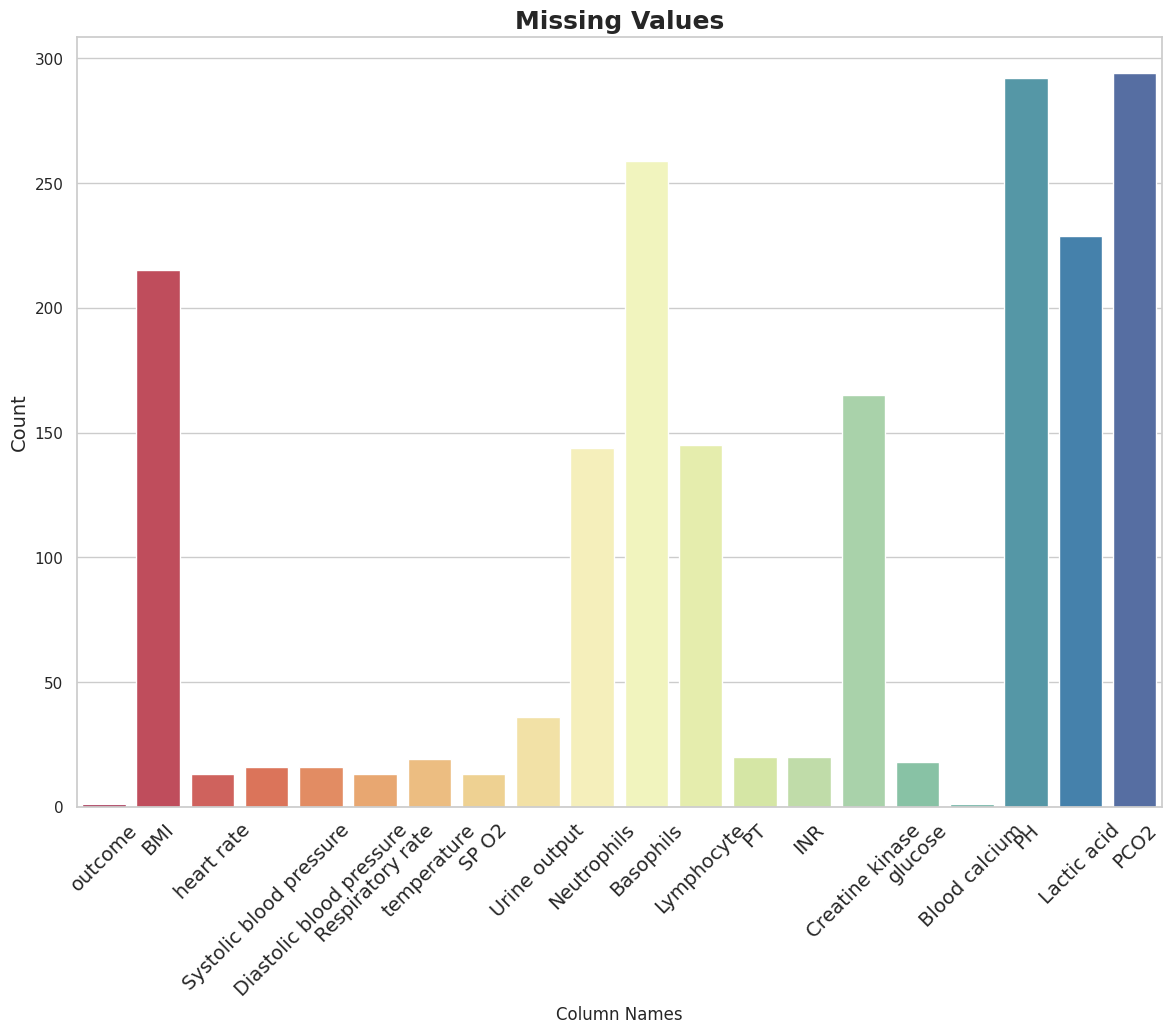

In [ ]:
# missing = ['outcome', 'BMI', 'heart rate',
#        'Systolic blood pressure', 'Diastolic blood pressure',
#        'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
#        'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
#        'Creatine kinase','glucose', 'Blood calcium',
#        'PH', 'Lactic acid', 'PCO2']
# df.isnull().sum()
missing_values = df.isna().sum().to_dict()

keys = ['outcome', 'BMI', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'Creatine kinase','glucose', 'Blood calcium',
       'PH', 'Lactic acid', 'PCO2']
missing = {x:missing_values[x] for x in keys}


missing_values_df = pd.DataFrame(list(missing.items()), columns=['Column Names', 'Missing_Values'])
# fig = px.bar(missing_values_df, x = 'Column Names', y = 'Missing_Values', title = 'Missing Values')
# fig.show()
plt.figure(figsize = (14, 10))
sns.barplot(x = "Column Names", y = "Missing_Values", data = missing_values_df, palette = "Spectral")
plt.title("Missing Values", fontsize = 18, weight = "bold")
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize = 14)
plt.show()

In [ ]:
#check that if i remove all null value what happend

# Assuming your DataFrame is named 'df'
df_cleaned = df.dropna()

# Check the result
print(df_cleaned.shape,'\n\n',df_cleaned.isnull().sum())

(428, 51) 

 group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                 

In [ ]:
# So we can not remove row. Because the data size is reduced huge

# Now we replace missing values with the same age value within each group


# Assuming your DataFrame is named 'df'

for group in df['group'].unique():
    df.loc[df['group'] == group, :] = df.loc[df['group'] == group, :].fillna(method='ffill')

print(df.shape, '\n\n', df.isnull().sum())

(1177, 51) 

 group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
BMI                         2
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                

In [ ]:
#there are again 2 missing value so we remove the row

# Assuming your DataFrame is named 'df'
df = df.dropna()

# Check the result
print(df.shape, '\n\n', df.isnull().sum())

(1175, 51) 

 group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                

### Outlier Checking

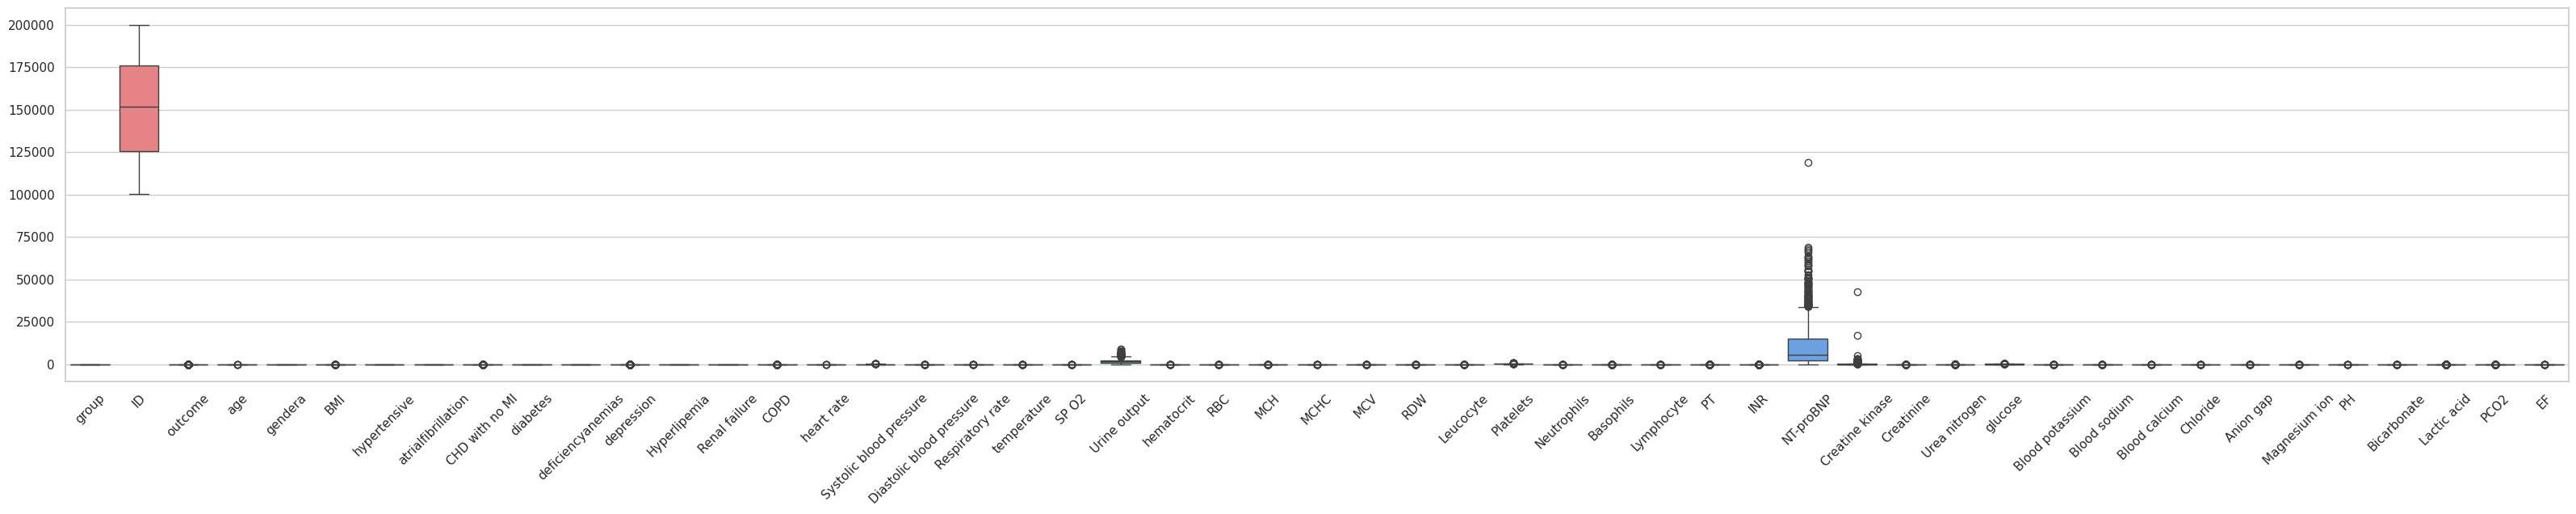

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# For example, df = pd.read_csv('your_dataset.csv')

# Create box plots for numerical columns
plt.figure(figsize=(40, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

### Outlier Remove

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1175 non-null   int64  
 1   ID                        1175 non-null   int64  
 2   outcome                   1175 non-null   float64
 3   age                       1175 non-null   int64  
 4   gendera                   1175 non-null   int64  
 5   BMI                       1175 non-null   float64
 6   hypertensive              1175 non-null   int64  
 7   atrialfibrillation        1175 non-null   int64  
 8   CHD with no MI            1175 non-null   int64  
 9   diabetes                  1175 non-null   int64  
 10  deficiencyanemias         1175 non-null   int64  
 11  depression                1175 non-null   int64  
 12  Hyperlipemia              1175 non-null   int64  
 13  Renal failure             1175 non-null   int64  
 14  COPD    

In [ ]:

df_numeric = df[['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']]

In [ ]:
df_numeric.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,37.588179,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,74.65,0.40,13.3,10.600000,1.000000,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,81.80,0.15,14.5,27.066667,2.666667,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
# calculating zscore of numeric columns in the dataset
from scipy import stats
z = np.abs(stats.zscore(df_numeric))
print(z)

         group        ID   outcome       age   gendera       BMI  \
0     0.651339  0.885205  0.394156  0.157185  1.049747  0.767211   
1     0.651339  0.376632  0.394156  0.066956  0.952611  0.767211   
2     0.651339  1.410828  0.394156  0.664668  0.952611  0.387095   
3     0.651339  0.694383  0.394156  2.323891  0.952611  5.553595   
4     0.651339  0.429057  0.394156  0.066956  0.952611  0.163278   
...        ...       ...       ...       ...       ...       ...   
1172  1.535299  0.702101  0.394156  0.904325  1.049747  0.497728   
1173  1.535299  1.690793  0.394156  0.291098  1.049747  0.465679   
1174  1.535299  0.389999  0.394156  0.814096  0.952611  0.668019   
1175  1.535299  1.025739  0.394156  0.365812  0.952611  0.526236   
1176  1.535299  1.484918  0.394156  2.025035  1.049747  0.748748   

      hypertensive  atrialfibrillation  CHD with no MI  diabetes  \
0         1.596825            0.908039        0.306661  1.172065   
1         1.596825            0.908039        0

In [ ]:
# Defining threshold for filtering outliers
threshold = 3
print(np.where(z >= 3))

(array([   1,    2,    2,    2,    3,    3,    4,    5,    6,    6,    6,
          9,   12,   13,   13,   14,   14,   14,   14,   15,   18,   18,
         18,   18,   19,   19,   20,   22,   23,   23,   24,   24,   28,
         33,   34,   37,   40,   42,   45,   47,   47,   52,   53,   54,
         55,   57,   57,   58,   61,   62,   63,   63,   67,   68,   69,
         70,   71,   78,   81,   85,   88,   89,   89,   90,   93,   97,
         97,   98,  103,  106,  108,  111,  113,  113,  114,  126,  126,
        126,  127,  129,  134,  141,  142,  143,  143,  148,  149,  149,
        149,  150,  153,  155,  156,  157,  157,  158,  159,  159,  159,
        161,  162,  162,  164,  165,  167,  167,  173,  176,  178,  187,
        187,  187,  191,  192,  195,  195,  195,  198,  200,  202,  203,
        204,  206,  214,  214,  214,  217,  220,  223,  226,  228,  228,
        230,  234,  234,  235,  237,  238,  241,  241,  242,  249,  255,
        255,  255,  256,  259,  264,  264,  264,  

In [ ]:
df.shape

(1175, 51)

In [ ]:
#filtering outliers retaining only those data points which are below threshhold
df = df[(z <= 3).all(axis=1)]

In [ ]:
df.shape

(719, 51)

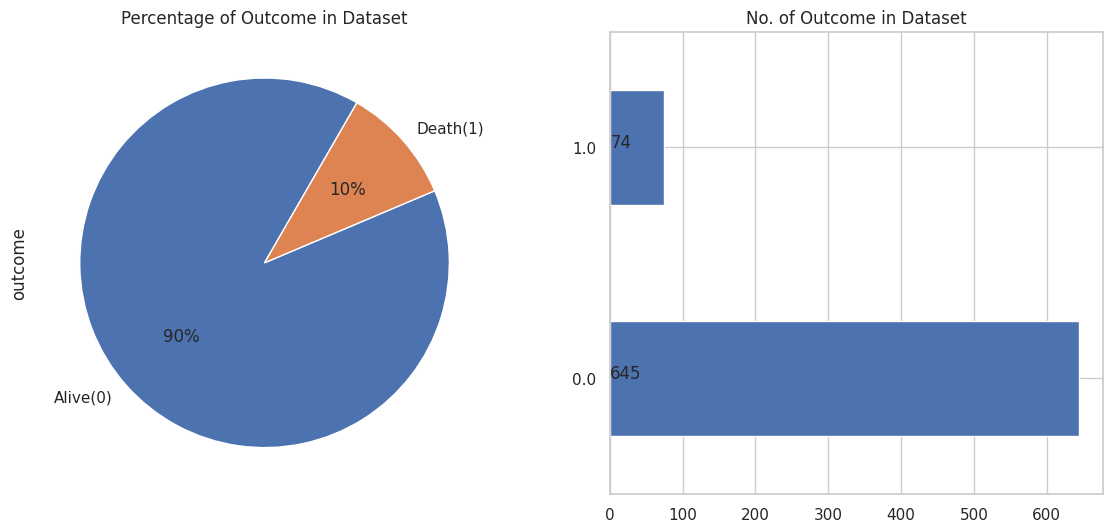

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['outcome'].value_counts().plot.pie( x="outcome" ,y ='Total outcome',
                   autopct = "%1.0f%%",labels=["Alive(0)","Death(1)"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Outcome in Dataset')

ax2 = df["outcome"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["outcome"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Outcome in Dataset')
plt.show()

In [ ]:
# X = all columns except outcome
# y = outcome

y = df[['outcome']]
X = df.drop(columns = ['outcome'])

### Oversampling using SMOTE

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', n_jobs = -1)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled.shape, y_resampled.shape

((1290, 50), (1290, 1))

In [ ]:
y_resampled.value_counts()

outcome
0.0        645
1.0        645
dtype: int64

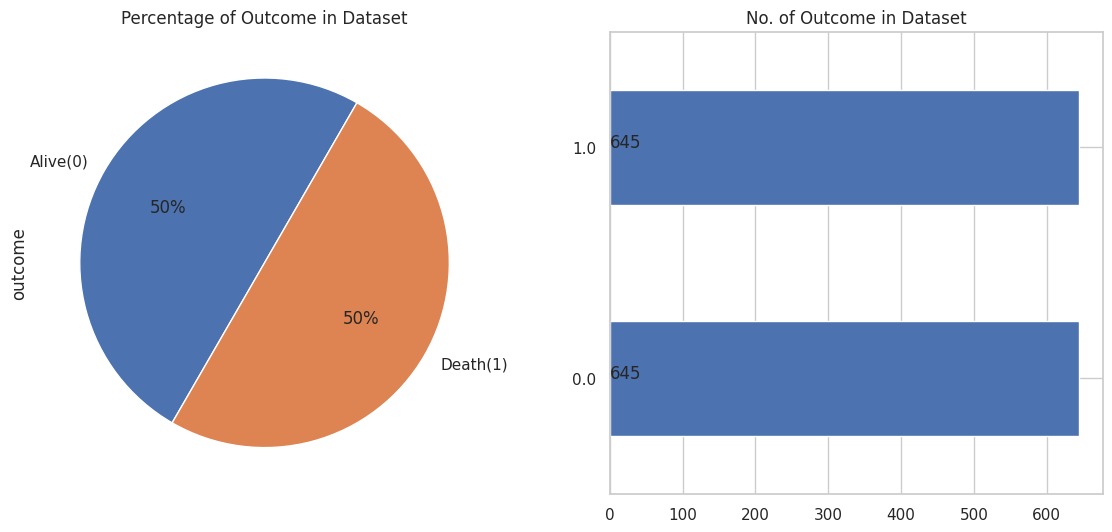

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = y_resampled['outcome'].value_counts().plot.pie( x="outcome" ,y ='Total outcome',
                   autopct = "%1.0f%%",labels=["Alive(0)","Death(1)"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Outcome in Dataset')

ax2 = y_resampled["outcome"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(y_resampled["outcome"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Outcome in Dataset')
plt.show()

In [ ]:
y = y_resampled
X = X_resampled

In [ ]:
# imputerX = SimpleImputer(missing_values=np.nan, strategy='mean')
imputerX = KNNImputer(missing_values=np.nan, n_neighbors = 5)
cols = X.select_dtypes(include='float64').columns

len(cols),cols #36 column

(36,
 Index(['BMI', 'heart rate', 'Systolic blood pressure',
        'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
        'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
        'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
        'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
        'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
        'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
        'Bicarbonate', 'Lactic acid', 'PCO2'],
       dtype='object'))

In [ ]:
imputerX.fit(X[cols])

KNNImputer()

In [ ]:
X[cols] = imputerX.transform(X[cols])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1290 non-null   int64  
 1   ID                        1290 non-null   int64  
 2   age                       1290 non-null   int64  
 3   gendera                   1290 non-null   int64  
 4   BMI                       1290 non-null   float64
 5   hypertensive              1290 non-null   int64  
 6   atrialfibrillation        1290 non-null   int64  
 7   CHD with no MI            1290 non-null   int64  
 8   diabetes                  1290 non-null   int64  
 9   deficiencyanemias         1290 non-null   int64  
 10  depression                1290 non-null   int64  
 11  Hyperlipemia              1290 non-null   int64  
 12  Renal failure             1290 non-null   int64  
 13  COPD                      1290 non-null   int64  
 14  heart ra

In [ ]:
# Imputing y with most frequent value
imputer_y = SimpleImputer(strategy = "most_frequent")
imputer_y.fit(y)
y = imputer_y.transform(y)
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
y = pd.DataFrame(y, columns=['outcome'], dtype='int64')
y

,outcome
0,0
1,0
2,0
3,0
4,0
...,...
1285,1
1286,1
1287,1
1288,1


In [ ]:
df_final = X.copy()
df_final['outcome'] = y
df_final.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome
0,1,125047,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900000,16.220000,7.650000,305.100000,74.65,0.40,13.30,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230000,21.166667,0.500000,40.000000,55,0
1,1,153461,83,2,22.311111,1,1,0,1,1,0,0,0,0,84.666667,141.130435,46.913043,18.400000,36.673611,97.875000,3039.0,28.800000,2.867143,33.214286,33.742857,98.571429,13.157143,8.500000,222.714286,80.70,0.20,13.45,16.671429,1.571429,1144.0,81.000000,0.575000,16.714286,147.800000,4.237500,140.000000,9.171429,104.250000,12.571429,2.187500,7.550000,27.571429,0.650000,31.333333,75,0
2,1,113076,61,2,19.992243,1,1,0,1,0,0,0,1,0,91.916667,98.434783,52.652174,18.583333,37.103175,98.041667,1625.0,31.241176,3.417500,29.193750,31.918750,91.562500,15.506250,3.806250,129.882353,67.00,0.55,25.55,19.275000,1.750000,21050.0,117.166667,2.131579,79.736842,98.428571,4.718182,141.090909,9.443750,103.181818,16.863636,2.035294,7.360000,25.772727,0.666667,46.000000,50,0
3,1,104216,70,2,50.461212,1,0,0,1,0,0,1,0,0,95.629630,149.035714,48.785714,17.481481,37.555556,95.250000,1305.0,27.481818,3.182222,28.266667,33.033333,85.777778,15.488889,10.222222,185.333333,67.00,0.55,25.55,12.950000,1.100000,2429.0,615.250000,1.820000,22.900000,119.571429,4.409091,140.272727,8.450000,108.400000,13.600000,1.763636,7.248889,22.800000,0.700000,48.111111,75,0
4,1,135608,83,2,25.391896,1,0,0,1,1,0,1,0,0,65.160000,103.260870,50.478261,17.400000,36.477778,96.080000,2360.0,33.275000,3.532500,31.375000,33.300000,94.500000,12.625000,7.900000,309.250000,69.65,0.40,24.45,13.275000,1.125000,3295.5,65.500000,0.833333,11.333333,111.666667,4.033333,140.333333,9.100000,107.666667,13.000000,2.166667,7.430000,23.666667,0.700000,40.000000,55,0


In [ ]:
df_final.shape

(1290, 51)

In [ ]:
# Changing gendera to gender
df_final.rename(columns = {
    'gendera':'gender',
    'Hyperlipemia':'hyperlipidemia'
},
          inplace = True)

In [ ]:
df_final.columns

Index(['group', 'ID', 'age', 'gender', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'hyperlipidemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF', 'outcome'],
      dtype='object')

# Exploratory Data Analysis

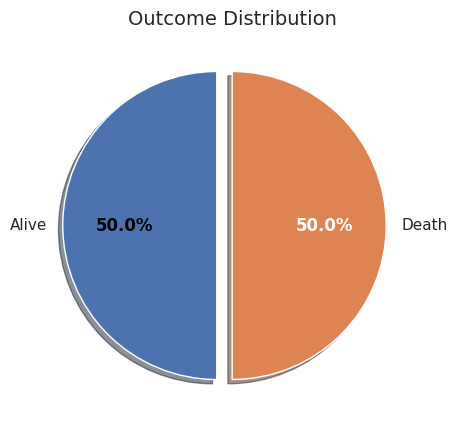

In [ ]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(df_final['outcome'].value_counts(), autopct= '%1.1f%%', shadow=True,
                                   startangle=90, explode=(0.1, 0), labels=['Alive','Death'])

plt.setp(autotexts, size=12, color = 'black', weight='bold')
autotexts[1].set_color('white');

plt.title('Outcome Distribution', fontsize=14)
plt.show()

<Axes: xlabel='diabetes', ylabel='Count'>

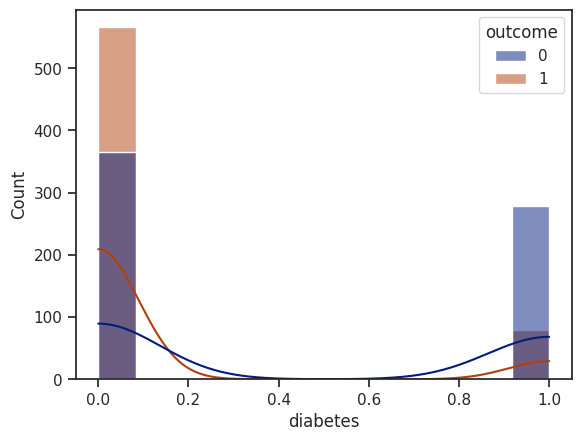

In [ ]:
sns.set_style("ticks")
sns.histplot(data = df_final, x = "diabetes", kde = True, hue = "outcome", palette = "dark")

In [ ]:
predictors = list(df_final.columns)
predictors.remove("outcome")
target = df_final['outcome']

In [ ]:
predictors.remove("group")
predictors.remove("ID")

In [ ]:
# fig, axes = plt.subplots(nrows=24, ncols=2, figsize=(16,140))
# axes = axes.flatten()

# for idx, axis in enumerate(axes):
#     sns.histplot(data=df_final, x=df_final[predictors].iloc[:, idx],
#                  ax=axis, hue=target, legend=True, kde = True, palette = "dark") #["#682F2F","#F3AB60"], viridis, dark
#     axis.set_ylabel('')
#     axis.set_xlabel('')
#     axis.set_title(predictors[idx], fontsize = 20)

# plt.subplots_adjust(hspace = 0.4)
# plt.show()

In [ ]:
labels = ['No hypertensive+A', 'No hypertensive+D', 'hypertensive+A', 'hypertensive+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['hypertensive', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

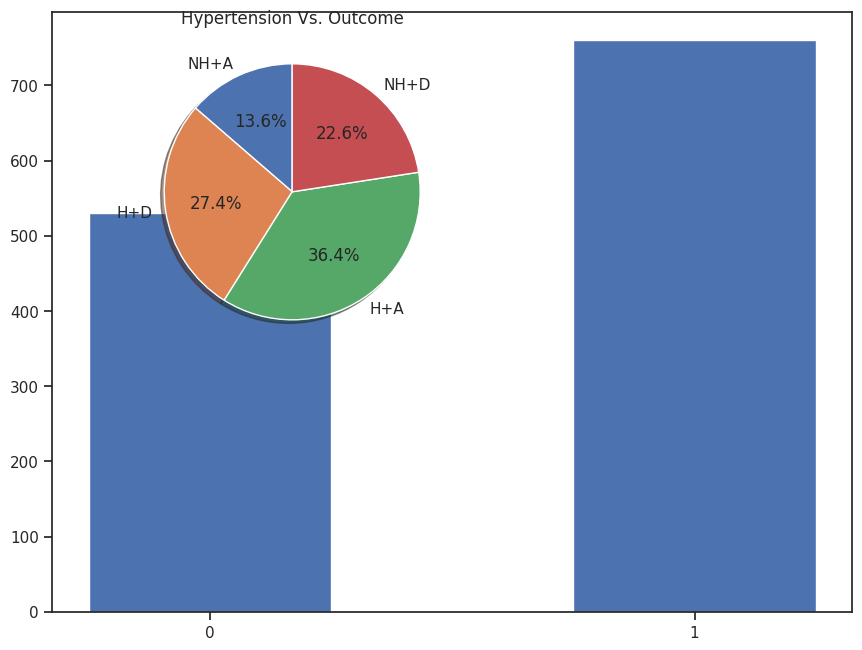

In [ ]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.1,0.4, 0.4,0.6])
lab = ['NH+A', 'H+D', 'H+A', 'NH+D']
ax1.bar(df_final['hypertensive'].unique(),df_final['hypertensive'].value_counts(sort=False), width=0.5)
ax1.set_xticks([0,1])

ax2.pie(df_final.groupby(by=['hypertensive', 'outcome']).outcome.count(), autopct= '%1.1f%%', shadow=True,
                                   startangle=90, labels=lab)
plt.title('Hypertension Vs. Outcome')

plt.show()

In [ ]:
labels = ['No atrialfibrillation+A', 'No atrialfibrillation+D', 'atrialfibrillation+A', 'atrialfibrillation+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['atrialfibrillation', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

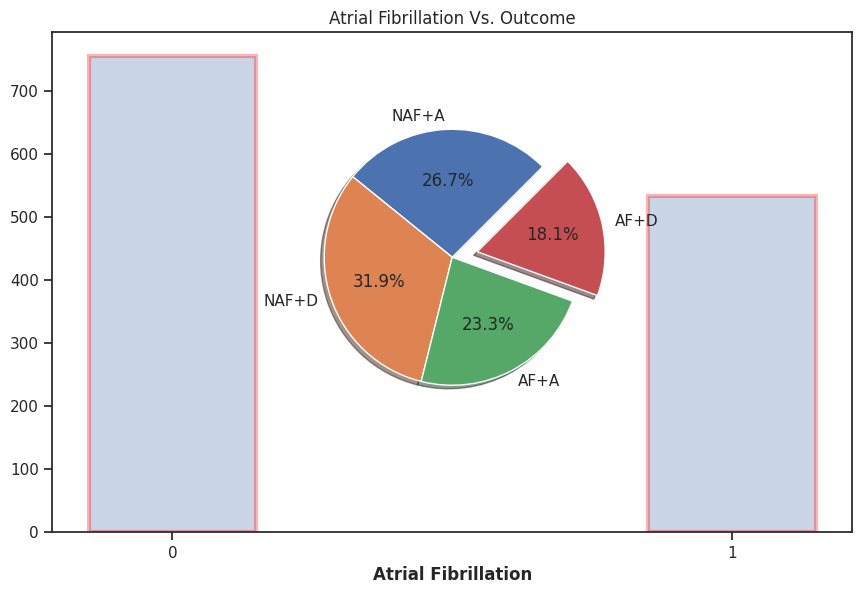

atrialfibrillation  outcome
0                   0          344
                    1          412
1                   0          301
                    1          233
Name: outcome, dtype: int64


In [ ]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.3,0.2, 0.4,0.7])
lab = ['NAF+A', 'NAF+D', 'AF+A', 'AF+D']

ax1.bar(df_final['atrialfibrillation'].unique(), df_final['atrialfibrillation'].value_counts(sort=False),
        width=0.3, alpha=0.3, edgecolor='red', linewidth=3)
ax1.set_xticks([0,1])
ax1.set_xlabel('Atrial Fibrillation', fontsize=12, weight='bold')
ax1.set_title('Atrial Fibrillation Vs. Outcome')

ax2.pie(df_final.groupby(['atrialfibrillation', 'outcome']).outcome.count(),autopct='%1.1f%%',
        shadow=True, labels=lab, explode=(0,0,0,0.2), startangle=45)

plt.show()

print(df_final.groupby(['atrialfibrillation', 'outcome']).outcome.count())

In [ ]:
labels = ['No CHD+A', 'No CHD+D', 'CHD+A', 'CHD+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['CHD with no MI', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

In [ ]:
# fig = plt.figure(figsize=(8,5))
# ax1 = fig.add_axes([0,0,1,1])
# ax2 = fig.add_axes([0.3,0.4, 0.35, 0.7])
# lab = ['NCHD+A', 'NCHD+D', 'CHD+A', 'CHD+D']

# ax1.bar(df_final['CHD with no MI'].unique(), df_final['CHD with no MI'].value_counts(sort=False), width=0.3,
#         alpha=0.4, linewidth=2, edgecolor='r', color=['red', 'blue'])
# ax1.set_xticks([0,1])

# ax1.set_title('CHD with no MI Vs. Outcome')

# ax2.pie(df_final.groupby(['CHD with no MI', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=lab,explode=(0,0,0,0.2), shadow=True, startangle=45)

# plt.show()

# print(df_final.groupby(['CHD with no MI', 'outcome']).outcome.count())

In [ ]:
labels = ['No Diabetic+A', 'No Diabetic+D', 'Diabetic+A', 'Diabetic+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['diabetes', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

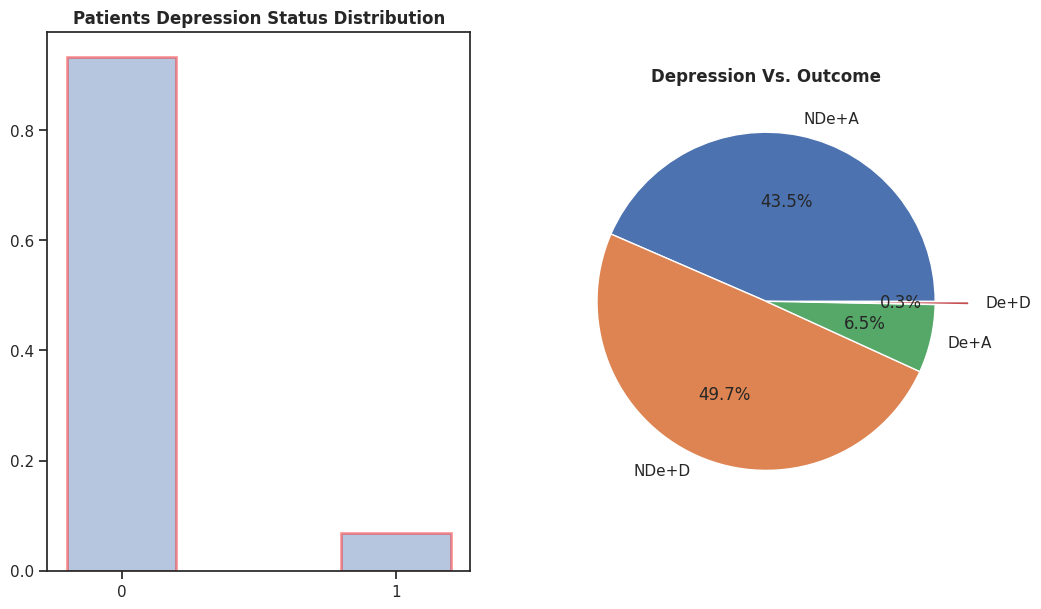

depression  outcome
0           0          561
            1          641
1           0           84
            1            4
Name: outcome, dtype: int64


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,7))

plot = ax[0].bar(df_final['depression'].unique(), df_final['depression'].value_counts(sort=False, normalize=True), width=0.4, alpha=0.4, edgecolor='red', linewidth=2)
ax[0].set_xticks([0,1])
ax[0].set_title('Patients Depression Status Distribution', weight='bold')

plt.subplot(1,2,2)
plt.pie(df_final.groupby(['depression', 'outcome']).outcome.count(), autopct='%1.1f%%', labels= ['NDe+A', 'NDe+D', 'De+A', 'De+D'],
        explode=(0,0,0,0.2))
plt.title('Depression Vs. Outcome', weight='bold')

plt.show()

print(df_final.groupby(['depression', 'outcome']).outcome.count())

In [ ]:
labels = ['No Depressed+A', 'No Depressed+D', 'Depressed+A', 'Depressed+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['depression', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

In [ ]:
labels = ['No Hyperlipidemia+A', 'No Hyperlipidemia+D', 'Hyperlipidemia+A', 'Hyperlipidemia+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['hyperlipidemia', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

In [ ]:
labels = ['No COPD+A', 'No COPD+D', 'COPD+A', 'COPD+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['COPD', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

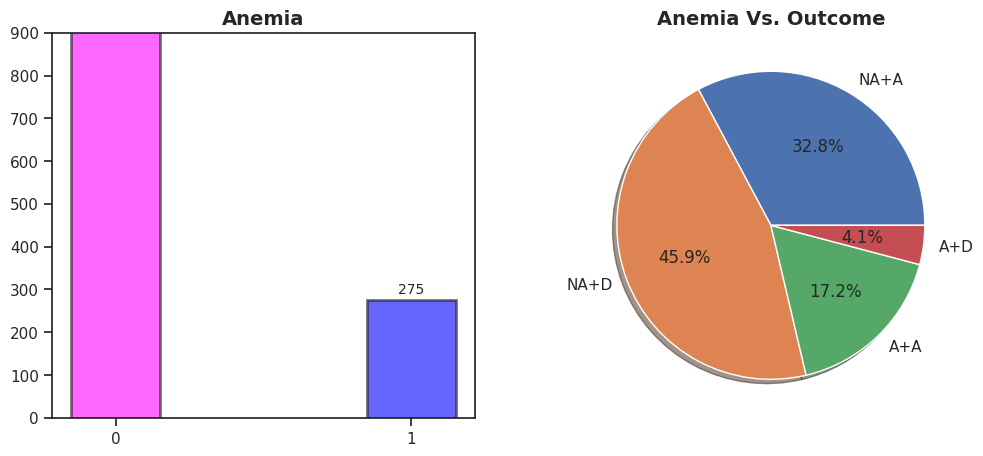

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))


ax[0].bar(df_final['deficiencyanemias'].unique(), df_final['deficiencyanemias'].value_counts(sort=False),
          width=0.3, alpha=0.6, color=['blue', 'magenta'], edgecolor='k', linewidth=2)
ax[0].set_title('Anemia', fontsize=14, weight='bold')
ax[0].set_xticks([0,1])
ax[0].set_ylim(0, 900)

for x in ax[0].patches:
  ax[0].annotate(format(x.get_height()),
                 (x.get_x() + x.get_width() / 2,
                 x.get_height()), ha='center', va='center',
                 size=10, xytext=(0,8),
                 textcoords = 'offset points')

ax[1].pie(df_final.groupby(['deficiencyanemias', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=['NA+A', 'NA+D', 'A+A', 'A+D'], shadow=True)
ax[1].set_title('Anemia Vs. Outcome', fontsize=14, weight='bold')

plt.show()

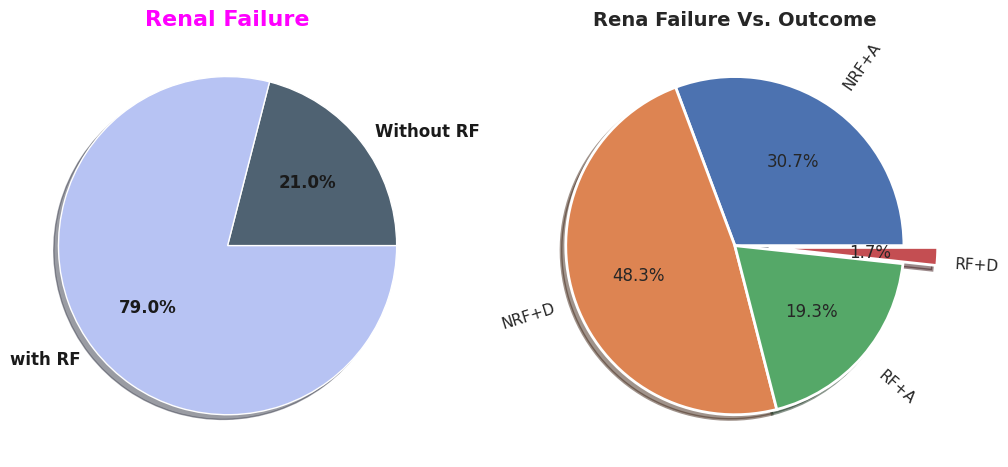

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.pie(df_final['Renal failure'].value_counts(sort=False), autopct='%1.1f%%', shadow=True, labels=['Without RF', 'with RF'],
        colors = ['#4F6272', '#B7C3F3'], textprops = {'color':'k', 'weight':'bold', 'size': 12},
        rotatelabels=False);
plt.title('Renal Failure', fontsize=16, weight='bold', color='magenta')

plt.subplot(1,2,2)
plt.pie(df_final.groupby(['Renal failure', 'outcome']).outcome.count(), autopct='%1.1f%%', shadow=True,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        labels = ['NRF+A', 'NRF+D', 'RF+A', 'RF+D'],
        explode=(0,0,0,0.2), rotatelabels=True)
plt.title('Rena Failure Vs. Outcome', fontsize=14, weight='bold')

plt.show()

In [ ]:
# fig = plt.figure(figsize=(10,6))

# ax1 = fig.add_axes([0,0,1,1])
# ax2 = fig.add_axes([0.2,0.5,0.8,0.5])

# ax1.bar(df_final['COPD'].unique(), df_final['COPD'].value_counts(), width=0.3, color=['red', 'brown'], alpha=0.3, edgecolor='k', linewidth=2)

# for y in ax1.patches:
#   ax1.annotate(format(y.get_height()),
#                (y.get_x() + y.get_width()/2,
#                 y.get_height()), ha='center', va='center',
#                size=10, xytext=(0,8),
#                textcoords = 'offset points')
# ax1.set_title('COPD', weight='bold')
# ax1.set_xticks([0,1])

# ax2.pie(df_final.groupby(['COPD', 'outcome']).outcome.count(), autopct='%1.1f%%',
#         labels=['NC+A', 'NC+D', 'C+A', 'C+D'])

# plt.show()

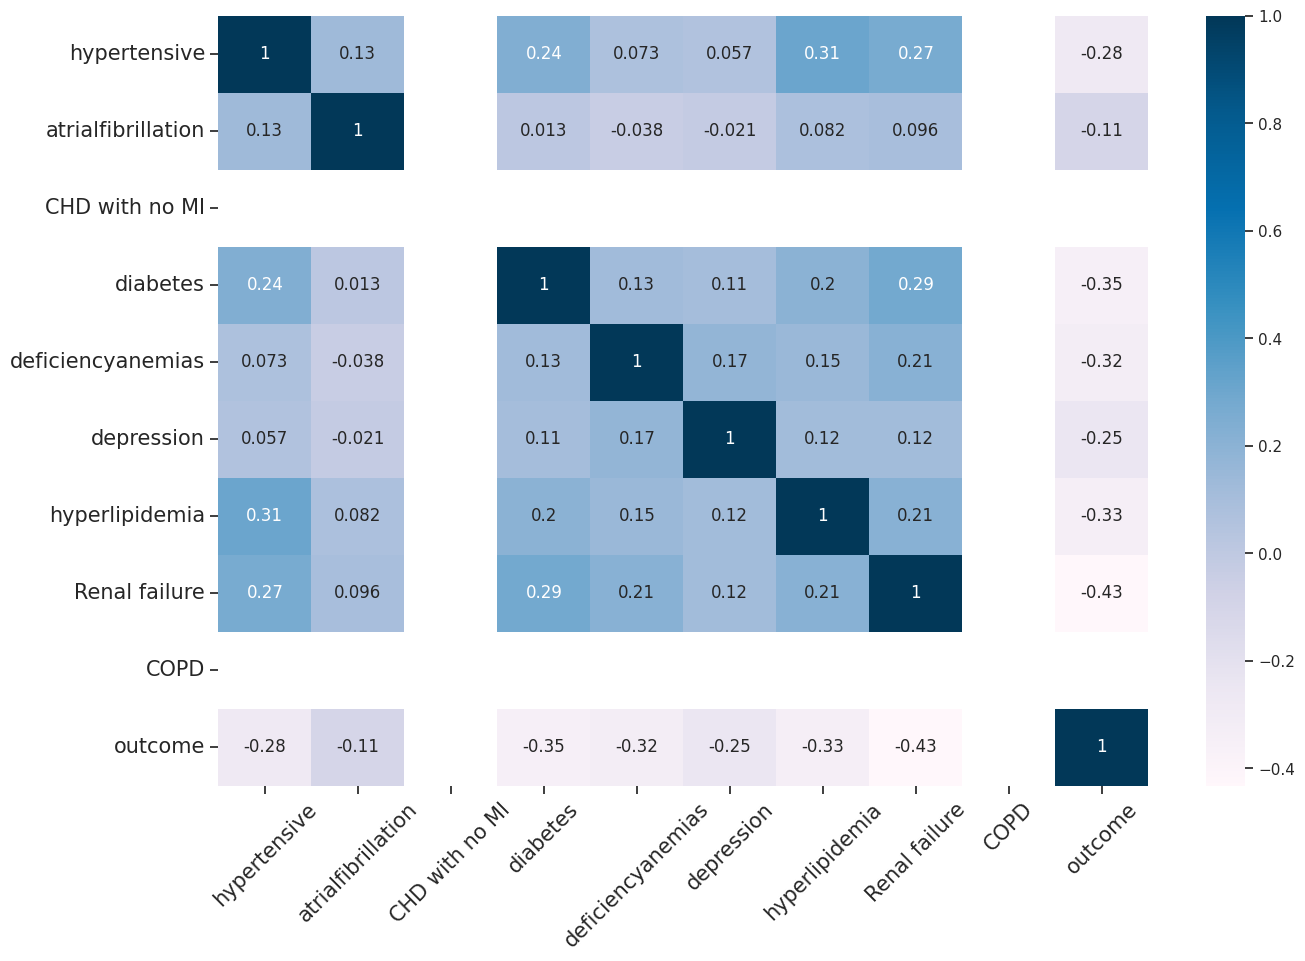

In [ ]:
corr_cols = ['hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
             'depression', 'hyperlipidemia', 'Renal failure', 'COPD', 'outcome']

cor = df_final[corr_cols].corr()

plt.figure(figsize=(15,10))
sns.heatmap(cor, annot = True, cmap = "PuBu")
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.show()

In [ ]:
# continous_corr = ['heart rate','hematocrit', 'RBC', 'MCH',
#         'Basophils', 'Lymphocyte', 'PT', 'Creatinine', 'Urea nitrogen',
#        'Chloride', 'Anion gap', 'Bicarbonate',
#        'Lactic acid', 'PCO2'] # BMI, Urine Output

# corr2 = df_final[continous_corr].corr()
# df_lt = corr2.where(np.tril(np.ones(corr2.shape)).astype(np.bool))
# plt.figure(figsize=(15,10))
# hmap=sns.heatmap(df_lt,cmap="Spectral", annot = True)
# plt.xticks(fontsize = 15, rotation = 45)
# plt.yticks(fontsize = 15)
# plt.title("Correlation Map for Vital Features", fontsize=15, weight="bold")
# plt.show()

In [ ]:
# continous_corr = ['age', 'Systolic blood pressure', 'Diastolic blood pressure',
#        'Respiratory rate', 'SP O2', 'Urine output',
#        'hematocrit', 'MCHC', 'Platelets', 'Neutrophils', 'PT', 'INR',
#        'NT-proBNP', 'Creatine kinase', 'Urea nitrogen','glucose', 'PCO2', 'EF', 'outcome']

# corr2 = df_final[continous_corr].corr()
# corr2.style.background_gradient(cmap = 'PuBu')

In [ ]:
X = df_final[predictors]
y = df_final['outcome']
y.shape

(1290,)

In [ ]:
X.shape, y.shape

((1290, 48), (1290,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    test_size = 0.3, random_state = 11)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((903, 48), (387, 48), (903,), (387,))

In [ ]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
0    457
1    446
Name: outcome, dtype: int64
Distribution of traget variable in test set
1    199
0    188
Name: outcome, dtype: int64


In [ ]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(903, 48)
(903,)
------------Test Set------------------
(387, 48)
(387,)


# Normalization-minmax scalaer

In [ ]:
len(X_train.columns), X_train.columns

(48,
 Index(['age', 'gender', 'BMI', 'hypertensive', 'atrialfibrillation',
        'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression',
        'hyperlipidemia', 'Renal failure', 'COPD', 'heart rate',
        'Systolic blood pressure', 'Diastolic blood pressure',
        'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
        'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
        'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
        'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
        'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
        'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
        'Lactic acid', 'PCO2', 'EF'],
       dtype='object'))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
       'diabetes', 'deficiencyanemias', 'depression', 'hyperlipidemia',
       'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']] = scaler.fit_transform(X_train[['age', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
       'diabetes', 'deficiencyanemias', 'depression', 'hyperlipidemia',
       'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']])
X_train.head()

,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,hyperlipidemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1218,0.111111,1,0.264310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.575394,0.211798,0.498048,0.533578,0.478890,0.694668,0.522836,0.353445,0.224555,0.789075,0.567241,0.756954,0.704151,0.290609,0.062009,0.875862,0.130692,0.120682,0.233949,0.201319,0.042796,0.010143,0.066339,0.147329,0.376407,0.477505,0.199286,0.250186,0.548135,0.472072,0.482711,0.335656,0.169747,0.255299,0.297243,0.650000
143,0.238095,1,0.240287,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.366948,0.766398,0.558433,0.320550,0.902205,0.719238,0.542957,0.444681,0.420150,0.545238,0.500878,0.514115,0.153106,0.476474,0.543068,0.707806,0.233333,0.250000,0.101968,0.064935,0.031778,0.022299,0.138372,0.117101,0.585447,0.321637,0.714456,0.299539,0.565441,0.451197,0.516192,0.604388,0.546875,0.114894,0.438961,0.666667
250,0.746032,1,0.249840,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.363014,0.914488,0.760255,0.425990,0.451582,0.580952,0.426635,0.348002,0.330400,0.547024,0.543539,0.489962,0.228384,0.317474,0.368293,0.687764,0.600000,0.166667,0.112701,0.081169,0.150084,0.032952,0.449302,0.312097,0.185082,0.438596,0.512713,0.569124,0.479589,0.600871,0.270386,0.447983,0.398897,0.165957,0.381818,0.500000
318,0.634921,2,0.413729,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.536955,0.439885,0.350082,0.534832,0.434324,0.500635,0.061916,0.642989,0.431588,0.902381,0.546067,0.897114,0.607577,0.388211,0.154968,0.806610,0.033333,0.060185,0.070125,0.077922,0.350439,0.006541,0.140000,0.205571,0.109582,0.445906,0.295452,0.635023,0.219071,0.576923,0.240343,0.414862,0.514706,0.225532,0.462857,0.333333
951,0.777778,1,0.217911,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510238,0.495586,0.270484,0.543120,0.578488,0.688813,0.148817,0.328755,0.203061,0.704872,0.443273,0.737019,0.407931,0.580671,0.403984,0.860176,0.074601,0.106385,0.741009,0.777357,0.097724,0.012892,0.090577,0.232999,0.188504,0.532056,0.672723,0.626990,0.631206,0.316368,0.546291,0.482154,0.522318,0.679382,0.438006,0.633333


In [ ]:
X_test[['age', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
       'diabetes', 'deficiencyanemias', 'depression', 'hyperlipidemia',
       'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']] = scaler.transform(X_test[['age', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
       'diabetes', 'deficiencyanemias', 'depression', 'hyperlipidemia',
       'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']])
X_test.head()

,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,hyperlipidemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
127,0.825397,1,0.218627,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.617169,0.774183,0.812491,0.706620,0.261745,0.610417,0.566770,0.430603,0.438236,0.530952,0.492978,0.504531,0.297281,0.450994,0.556297,0.628692,0.066667,0.358333,0.468297,0.458153,0.204519,0.015400,0.162791,0.242831,0.317387,0.498120,0.875286,0.433666,0.594776,0.326560,0.693718,0.209612,0.721758,0.102128,0.428571,0.666667
801,0.761905,1,0.310341,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.599057,0.395301,0.325675,0.360934,0.284104,0.613467,0.132763,0.297813,0.281732,0.611266,0.578237,0.544592,0.496511,0.492175,0.220933,0.571739,0.051024,0.234550,0.164185,0.130324,0.085557,0.017057,0.358173,0.680068,0.404108,0.410505,0.599137,0.321841,0.666779,0.570829,0.642307,0.509726,0.277629,0.772394,0.469612,0.666667
1236,0.746032,1,0.241104,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.870841,0.386811,0.345384,0.601747,0.518931,0.634923,0.170840,0.485782,0.562578,0.398325,0.477897,0.350863,0.323117,0.790592,0.243536,0.837133,0.085331,0.022556,0.356928,0.333770,0.312769,0.166333,0.365367,0.664588,0.359448,0.448949,0.446978,0.519109,0.412948,0.767133,0.766873,0.324508,0.324259,0.395375,0.412834,0.333333
1267,0.714286,2,0.362676,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.507275,0.459335,0.279249,0.725555,0.557578,0.370125,0.179320,0.388514,0.357148,0.563569,0.512495,0.531058,0.222480,0.652279,0.564200,0.738849,0.070456,0.206222,0.327582,0.304952,0.062036,0.011298,0.087312,0.102088,0.106816,0.297151,0.425388,0.248537,0.462595,0.380583,0.320649,0.531227,0.451117,0.189151,0.401997,0.583333
433,0.555556,1,0.340069,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.609543,0.431742,0.237894,0.601713,0.589645,0.518095,0.321121,0.322782,0.268808,0.627381,0.556180,0.572773,0.187555,0.384642,0.392105,0.649789,0.133333,0.255556,0.053667,0.064935,0.040795,0.022520,0.188837,0.165850,0.232539,0.343567,0.629103,0.577362,0.592085,0.541001,0.390558,0.447983,0.398897,0.944681,0.366234,0.500000


In [ ]:

import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline
!pip install --upgrade pip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
! pip install -q scikit-plot
import scikitplot as skplt
import pickle

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb

from scipy import stats

In [ ]:
comp_ev = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],

                           'F1_score(train)':[],
                          'ROC(train)':[],
                        'Log_Loss(train)':[],
                        'mathew_corrcoef(train)':[],
                         'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recall(test)':[],

                           'F1_score(test)':[],
                          'ROC(test)':[],
                        'Log_Loss(test)':[],
                        'mathew_corrcoef(test)':[],})

# Logistic Regression

The accuracy of the Logistic Regression is(For training data) : 0.897
The accuracy of the Logistic Regression is(For test data) : 0.873


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795


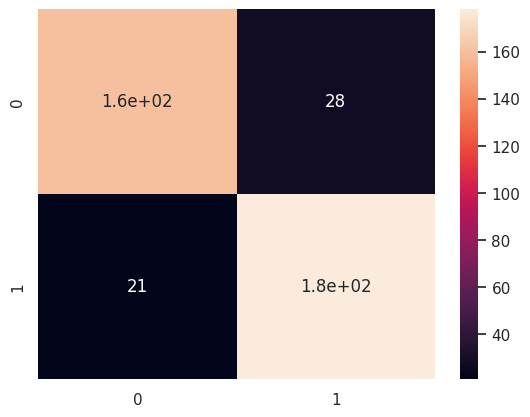

In [ ]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(log_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Logistic Regression is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(log_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Logistic Regression is(For test data) :',acc_test1)

y_pred_train= log_model.predict(X_train)
y_pred_test= log_model.predict(X_test)


precision_train1=format(precision_score(y_train, log_model.predict(X_train), average='macro'),'.3f')
precision_test1=format(precision_score(y_test, log_model.predict(X_test), average='macro'),'.3f')


recall_train1=format(recall_score(y_train,log_model.predict(X_train), average='macro'),'.3f')
recall_test1=format(recall_score(y_test,log_model.predict(X_test), average='macro'),'.3f')

f1_train1=format(f1_score(y_train,log_model.predict(X_train), average='macro'),'.3f')
f1_test1=format(f1_score(y_test,log_model.predict(X_test), average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Logistic Regression',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Support Vector Machine

The accuracy of the Support Vector Machine is(For training data) : 0.904
The accuracy of the Support Vector Machine is(For test data) : 0.884


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
1,Support Vector Machine,0.904,0.904,0.904,0.904,3.472644,0.807288,0.903654,0.884,0.884,0.883,0.884,0.883406,4.191122,0.767244
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795


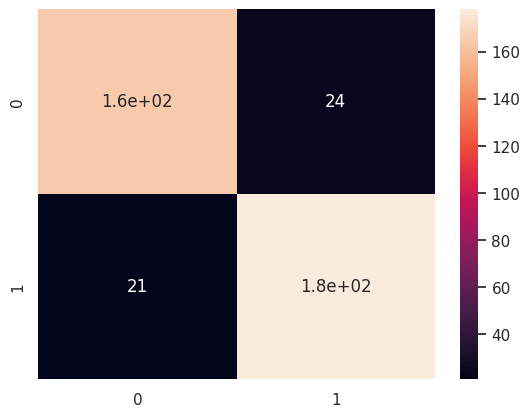

In [ ]:
svm_model =SVC(kernel='linear',gamma='auto',probability=True)
svm_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(svm_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Support Vector Machine is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(svm_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Support Vector Machine is(For test data) :',acc_test1)

y_pred_train= svm_model.predict(X_train)
y_pred_test= svm_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Support Vector Machine',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Decsion Tree

The accuracy of the Support Vector Machine is(For training data) : 1.000
The accuracy of the Support Vector Machine is(For test data) : 0.889


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.889,0.892,0.888,0.888,0.887696,4.004850,0.779466
1,Support Vector Machine,0.904,0.904,0.904,0.904,3.472644e+00,0.807288,0.903654,0.884,0.884,0.883,0.884,0.883406,4.191122,0.767244
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137e+00,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795


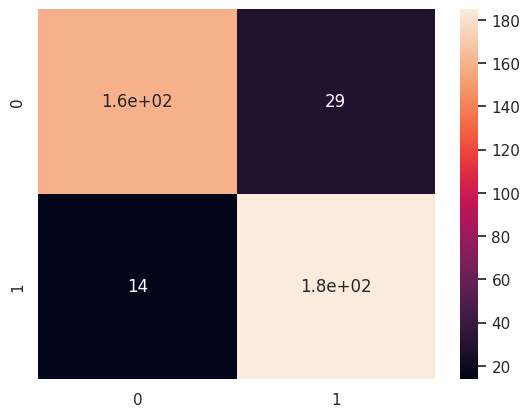

In [ ]:
dt_model =DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(dt_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Support Vector Machine is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(dt_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Support Vector Machine is(For test data) :',acc_test1)

y_pred_train= dt_model.predict(X_train)
y_pred_test= dt_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Decision Tree',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# KNN Classifier

The accuracy of the K Nearest Neighbour is(For training data) : 0.859
The accuracy of the K Nearest Neighbour is(For test data) : 0.822


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.889,0.892,0.888,0.888,0.887696,4.004850,0.779466
1,Support Vector Machine,0.904,0.904,0.904,0.904,3.472644e+00,0.807288,0.903654,0.884,0.884,0.883,0.884,0.883406,4.191122,0.767244
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137e+00,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795
3,K Nearest Neighbour,0.859,0.879,0.861,0.858,5.069262e+00,0.739638,0.860754,0.822,0.859,0.817,0.815,0.817077,6.426388,0.675013


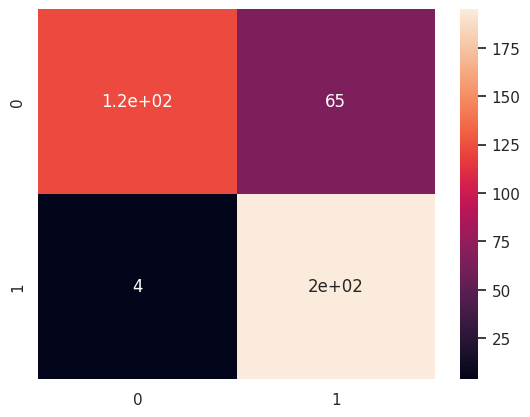

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=9);
knn_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(knn_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the K Nearest Neighbour is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(knn_model.predict(X_test), y_test),'.3f')
print('The accuracy of the K Nearest Neighbour is(For test data) :',acc_test1)

y_pred_train= knn_model.predict(X_train)
y_pred_test= knn_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['K Nearest Neighbour',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# MLP Classifier

The accuracy of the Multi-Layer Perceptron is(For training data) : 0.938
The accuracy of the Multi-Layer Perceptronr is(For test data) : 0.899


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
4,Multi-Layer Perceptron,0.938,0.938,0.938,0.938,2.235265e+00,0.875998,0.938029,0.899,0.900,0.899,0.899,0.898629,3.632306,0.798604
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.889,0.892,0.888,0.888,0.887696,4.004850,0.779466
1,Support Vector Machine,0.904,0.904,0.904,0.904,3.472644e+00,0.807288,0.903654,0.884,0.884,0.883,0.884,0.883406,4.191122,0.767244
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137e+00,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795
3,K Nearest Neighbour,0.859,0.879,0.861,0.858,5.069262e+00,0.739638,0.860754,0.822,0.859,0.817,0.815,0.817077,6.426388,0.675013


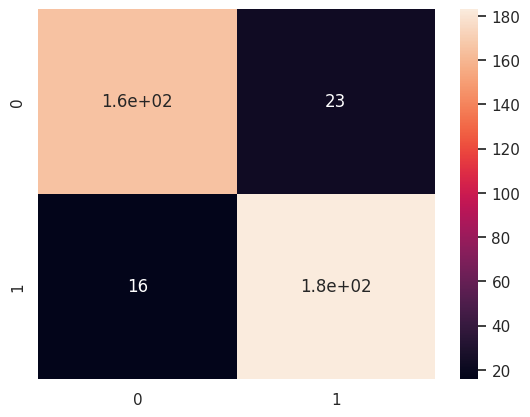

In [ ]:

mlp_model=MLPClassifier()
mlp_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(mlp_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Multi-Layer Perceptron is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(mlp_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Multi-Layer Perceptronr is(For test data) :',acc_test1)

y_pred_train= mlp_model.predict(X_train)
y_pred_test= mlp_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Multi-Layer Perceptron',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Random Forest

The accuracy of the Random Forest Classifier  is(For training data) : 1.000
The accuracy of the Random Forest Classifier is(For test data) : 0.951


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.951,0.952,0.950,0.951,0.950350,1.769585,0.902221
4,Multi-Layer Perceptron,0.938,0.938,0.938,0.938,2.235265e+00,0.875998,0.938029,0.899,0.900,0.899,0.899,0.898629,3.632306,0.798604
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.889,0.892,0.888,0.888,0.887696,4.004850,0.779466
1,Support Vector Machine,0.904,0.904,0.904,0.904,3.472644e+00,0.807288,0.903654,0.884,0.884,0.883,0.884,0.883406,4.191122,0.767244
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137e+00,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795
3,K Nearest Neighbour,0.859,0.879,0.861,0.858,5.069262e+00,0.739638,0.860754,0.822,0.859,0.817,0.815,0.817077,6.426388,0.675013


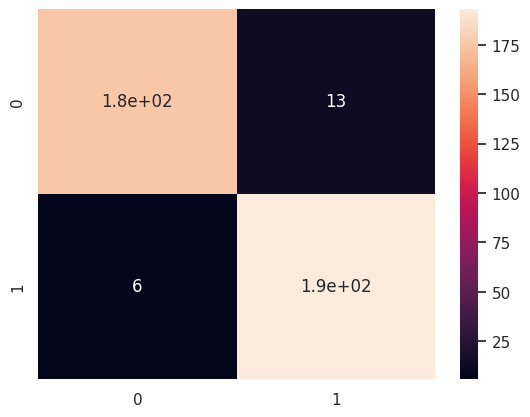

In [ ]:
rf_model =RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(rf_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Random Forest Classifier  is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(rf_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Random Forest Classifier is(For test data) :',acc_test1)

y_pred_train= rf_model.predict(X_train)
y_pred_test= rf_model.predict(X_test)


precision_train1=format(precision_score(y_train, rf_model.predict(X_train), average='macro'),'.3f')
precision_test1=format(precision_score(y_test, rf_model.predict(X_test), average='macro'),'.3f')


recall_train1=format(recall_score(y_train,rf_model.predict(X_train), average='macro'),'.3f')
recall_test1=format(recall_score(y_test,rf_model.predict(X_test), average='macro'),'.3f')

f1_train1=format(f1_score(y_train,rf_model.predict(X_train), average='macro'),'.3f')
f1_test1=format(f1_score(y_test,rf_model.predict(X_test), average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Random Forest Classifier',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Extra Tree

The accuracy of the Extra Tree Classifier is(For training data) : 1.000
The accuracy of the Extra Tree Classifieris(For test data) : 0.941


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.951,0.952,0.950,0.951,0.950350,1.769585,0.902221
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.941,0.941,0.940,0.940,0.940006,2.142129,0.881497
4,Multi-Layer Perceptron,0.938,0.938,0.938,0.938,2.235265e+00,0.875998,0.938029,0.899,0.900,0.899,0.899,0.898629,3.632306,0.798604
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.889,0.892,0.888,0.888,0.887696,4.004850,0.779466
1,Support Vector Machine,0.904,0.904,0.904,0.904,3.472644e+00,0.807288,0.903654,0.884,0.884,0.883,0.884,0.883406,4.191122,0.767244
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137e+00,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795
3,K Nearest Neighbour,0.859,0.879,0.861,0.858,5.069262e+00,0.739638,0.860754,0.822,0.859,0.817,0.815,0.817077,6.426388,0.675013


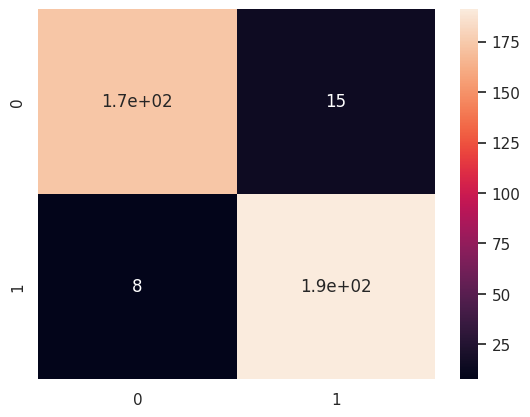

In [ ]:
et_model=ExtraTreesClassifier(n_estimators= 100)
et_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(et_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Extra Tree Classifier is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(et_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Extra Tree Classifieris(For test data) :',acc_test1)

y_pred_train= et_model.predict(X_train)
y_pred_test= et_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Extra Tree Classifier',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Stochastic Gradient Descent

The accuracy of the Stochastic Gradient Descent is(For training data) : 0.853
The accuracy of the Stochastic Gradient Descent(For test data) : 0.824


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.951,0.952,0.950,0.951,0.950350,1.769585,0.902221
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.941,0.941,0.940,0.940,0.940006,2.142129,0.881497
4,Multi-Layer Perceptron,0.938,0.938,0.938,0.938,2.235265e+00,0.875998,0.938029,0.899,0.900,0.899,0.899,0.898629,3.632306,0.798604
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.889,0.892,0.888,0.888,0.887696,4.004850,0.779466
1,Support Vector Machine,0.904,0.904,0.904,0.904,3.472644e+00,0.807288,0.903654,0.884,0.884,0.883,0.884,0.883406,4.191122,0.767244
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137e+00,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795
7,Stochastic Gradient Descent,0.853,0.875,0.854,0.851,5.308755e+00,0.728492,0.854189,0.824,0.861,0.820,0.818,0.819737,6.333252,0.679319
3,K Nearest Neighbour,0.859,0.879,0.861,0.858,5.069262e+00,0.739638,0.860754,0.822,0.859,0.817,0.815,0.817077,6.426388,0.675013


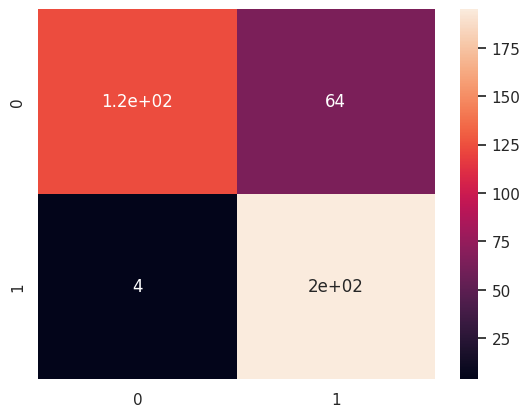

In [ ]:
sgd_model=SGDClassifier(max_iter=1000, tol=1e-4)
sgd_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(sgd_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Stochastic Gradient Descent is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(sgd_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Stochastic Gradient Descent(For test data) :',acc_test1)

y_pred_train= sgd_model.predict(X_train)
y_pred_test= sgd_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Stochastic Gradient Descent',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Gradient Descent

The accuracy of the Gradient Boosting is(For training data) : 0.998
The accuracy of the Gradient Boosting(For test data) : 0.928


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.951,0.952,0.950,0.951,0.950350,1.769585,0.902221
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.941,0.941,0.940,0.940,0.940006,2.142129,0.881497
8,Gradient Boosting,0.998,0.998,0.998,0.998,7.983090e-02,0.995570,0.997785,0.928,0.931,0.927,0.927,0.926561,2.607810,0.857141
4,Multi-Layer Perceptron,0.938,0.938,0.938,0.938,2.235265e+00,0.875998,0.938029,0.899,0.900,0.899,0.899,0.898629,3.632306,0.798604
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.889,0.892,0.888,0.888,0.887696,4.004850,0.779466
1,Support Vector Machine,0.904,0.904,0.904,0.904,3.472644e+00,0.807288,0.903654,0.884,0.884,0.883,0.884,0.883406,4.191122,0.767244
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137e+00,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795
7,Stochastic Gradient Descent,0.853,0.875,0.854,0.851,5.308755e+00,0.728492,0.854189,0.824,0.861,0.820,0.818,0.819737,6.333252,0.679319
3,K Nearest Neighbour,0.859,0.879,0.861,0.858,5.069262e+00,0.739638,0.860754,0.822,0.859,0.817,0.815,0.817077,6.426388,0.675013


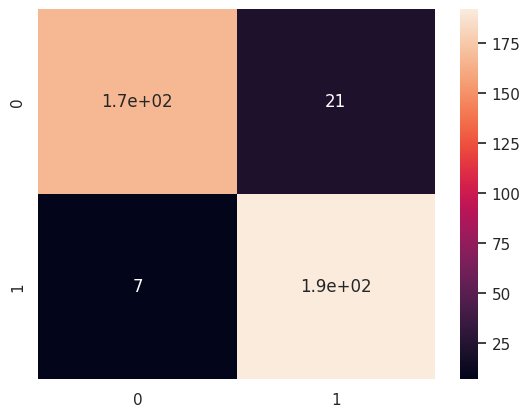

In [ ]:
gb_model=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gb_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(gb_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Gradient Boosting is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(gb_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Gradient Boosting(For test data) :',acc_test1)

y_pred_train= gb_model.predict(X_train)
y_pred_test= gb_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Gradient Boosting',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Adaboost classifier

The accuracy of the Adaptive Boosting is(For training data) : 0.962
The accuracy of the Adaptive Boosting(For test data) : 0.920


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.951,0.952,0.950,0.951,0.950350,1.769585,0.902221
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.941,0.941,0.940,0.940,0.940006,2.142129,0.881497
8,Gradient Boosting,0.998,0.998,0.998,0.998,7.983090e-02,0.995570,0.997785,0.928,0.931,0.927,0.927,0.926561,2.607810,0.857141
9,Adaptive Boosting,0.962,0.962,0.962,0.962,1.357125e+00,0.924846,0.962450,0.920,0.921,0.919,0.920,0.919317,2.887218,0.840050
4,Multi-Layer Perceptron,0.938,0.938,0.938,0.938,2.235265e+00,0.875998,0.938029,0.899,0.900,0.899,0.899,0.898629,3.632306,0.798604
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.889,0.892,0.888,0.888,0.887696,4.004850,0.779466
1,Support Vector Machine,0.904,0.904,0.904,0.904,3.472644e+00,0.807288,0.903654,0.884,0.884,0.883,0.884,0.883406,4.191122,0.767244
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137e+00,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795
7,Stochastic Gradient Descent,0.853,0.875,0.854,0.851,5.308755e+00,0.728492,0.854189,0.824,0.861,0.820,0.818,0.819737,6.333252,0.679319
3,K Nearest Neighbour,0.859,0.879,0.861,0.858,5.069262e+00,0.739638,0.860754,0.822,0.859,0.817,0.815,0.817077,6.426388,0.675013


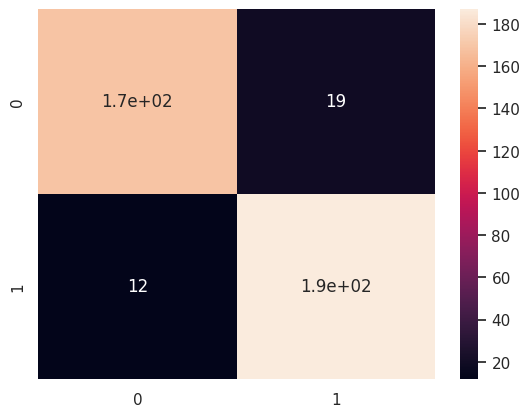

In [ ]:

ada_model=AdaBoostClassifier()
ada_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(ada_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Adaptive Boosting is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(ada_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Adaptive Boosting(For test data) :',acc_test1)

y_pred_train= ada_model.predict(X_train)
y_pred_test= ada_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Adaptive Boosting',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# XGBoost

The accuracy of the extreme Gradient Boosting is(For training data) : 1.000
The accuracy of the extreme Gradient Boosting(For test data) : 0.956


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
10,extreme Gradient Boosting,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.956,0.958,0.955,0.956,0.955375,1.583313,0.912949
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.951,0.952,0.950,0.951,0.950350,1.769585,0.902221
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.941,0.941,0.940,0.940,0.940006,2.142129,0.881497
8,Gradient Boosting,0.998,0.998,0.998,0.998,7.983090e-02,0.995570,0.997785,0.928,0.931,0.927,0.927,0.926561,2.607810,0.857141
9,Adaptive Boosting,0.962,0.962,0.962,0.962,1.357125e+00,0.924846,0.962450,0.920,0.921,0.919,0.920,0.919317,2.887218,0.840050
4,Multi-Layer Perceptron,0.938,0.938,0.938,0.938,2.235265e+00,0.875998,0.938029,0.899,0.900,0.899,0.899,0.898629,3.632306,0.798604
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.889,0.892,0.888,0.888,0.887696,4.004850,0.779466
1,Support Vector Machine,0.904,0.904,0.904,0.904,3.472644e+00,0.807288,0.903654,0.884,0.884,0.883,0.884,0.883406,4.191122,0.767244
0,Logistic Regression,0.897,0.897,0.897,0.897,3.712137e+00,0.794024,0.897035,0.873,0.874,0.873,0.873,0.872768,4.563667,0.746795
7,Stochastic Gradient Descent,0.853,0.875,0.854,0.851,5.308755e+00,0.728492,0.854189,0.824,0.861,0.820,0.818,0.819737,6.333252,0.679319


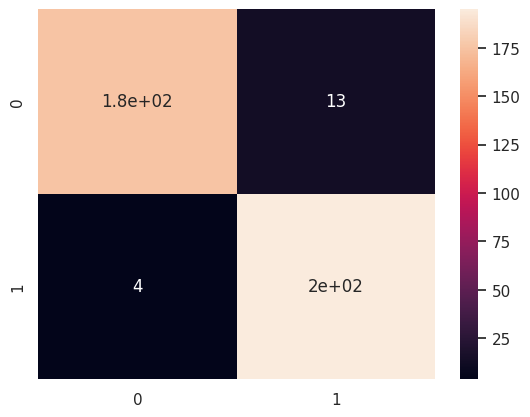

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(xgb_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the extreme Gradient Boosting is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(xgb_model.predict(X_test), y_test),'.3f')
print('The accuracy of the extreme Gradient Boosting(For test data) :',acc_test1)

y_pred_train= xgb_model.predict(X_train)
y_pred_test= xgb_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['extreme Gradient Boosting',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# ROC curve

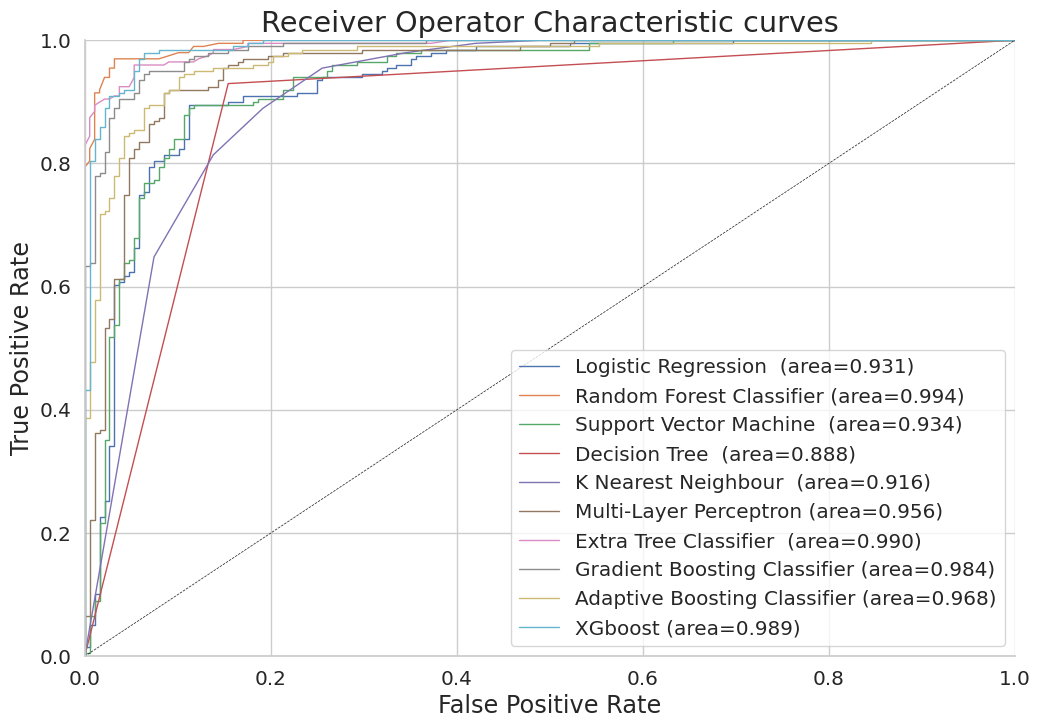

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,log_model.predict_proba(X_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,rf_model.predict_proba(X_test),label='Random Forest Classifier',l='-')
roc_auc_plot(y_test,svm_model.predict_proba(X_test),label='Support Vector Machine ',l='-')
roc_auc_plot(y_test,dt_model.predict_proba(X_test),label='Decision Tree ',l='-')
roc_auc_plot(y_test,knn_model.predict_proba(X_test),label='K Nearest Neighbour ',l='-')
roc_auc_plot(y_test,mlp_model.predict_proba(X_test),label='Multi-Layer Perceptron',l='-')
roc_auc_plot(y_test,et_model.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
#roc_auc_plot(y_test,sgd_model.predict_proba(X_test),label='Stochastic Gradient Descent',l='-')
roc_auc_plot(y_test,gb_model.predict_proba(X_test),label='Gradient Boosting Classifier',l='-')
roc_auc_plot(y_test,ada_model.predict_proba(X_test),label='Adaptive Boosting Classifier',l='-')
roc_auc_plot(y_test,xgb_model.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
# ax.legend(loc="lower right")
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')

ax.legend(loc="lower right", fontsize='large')  # Adjust legend font size
ax.set_xlabel('False Positive Rate', fontsize='x-large')  # Adjust x-axis label font size
ax.set_ylabel('True Positive Rate', fontsize='x-large')  # Adjust y-axis label font size


ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.tick_params(axis='both', which='major', labelsize='large')
ax.set_title('Receiver Operator Characteristic curves', fontsize='xx-large')
sns.despine()

# Precision-Recall Curve

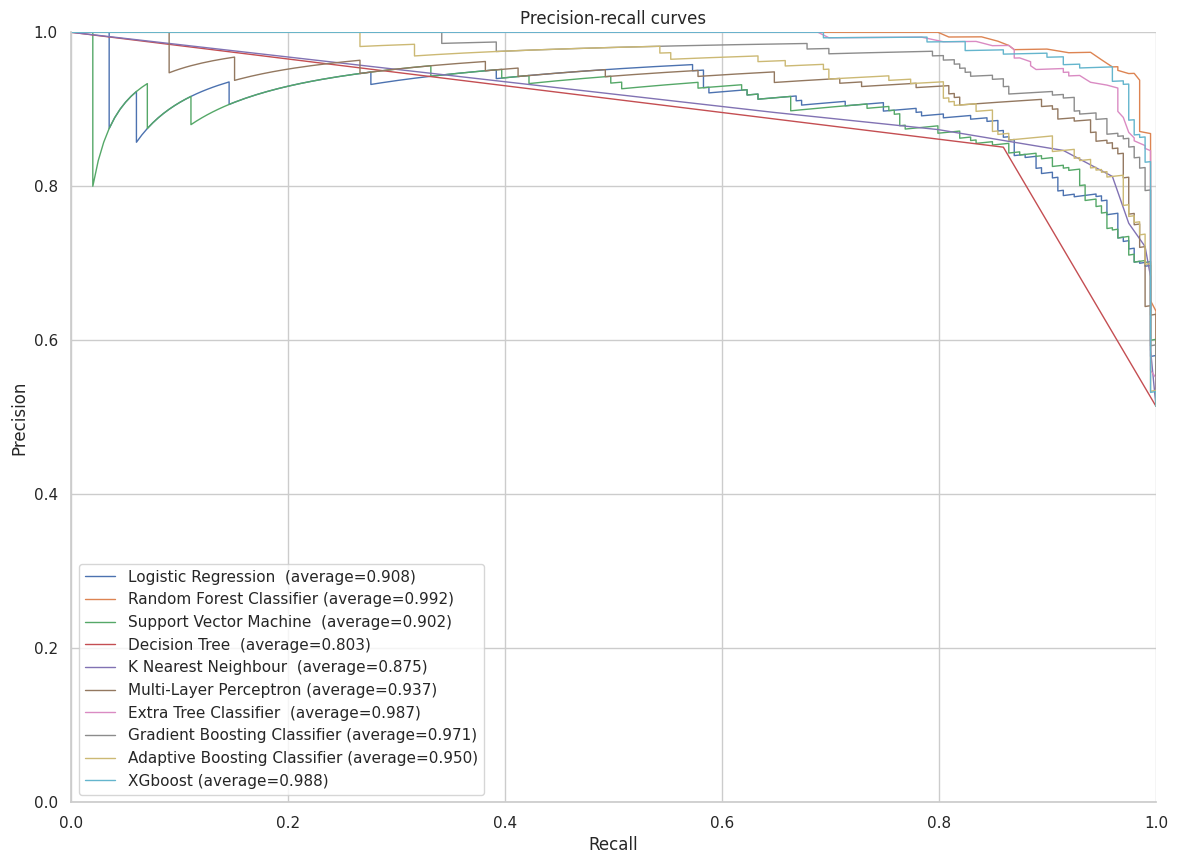

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

#precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
#precision_recall_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
#precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

precision_recall_plot(y_test,log_model.predict_proba(X_test),label='Logistic Regression ',l='-')
precision_recall_plot(y_test,rf_model.predict_proba(X_test),label='Random Forest Classifier',l='-')
precision_recall_plot(y_test,svm_model.predict_proba(X_test),label='Support Vector Machine ',l='-')
precision_recall_plot(y_test,dt_model.predict_proba(X_test),label='Decision Tree ',l='-')
precision_recall_plot(y_test,knn_model.predict_proba(X_test),label='K Nearest Neighbour ',l='-')
precision_recall_plot(y_test,mlp_model.predict_proba(X_test),label='Multi-Layer Perceptron',l='-')
precision_recall_plot(y_test,et_model.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
#roc_auc_plot(y_test,sgd_model.predict_proba(X_test),label='Stochastic Gradient Descent',l='-')
precision_recall_plot(y_test,gb_model.predict_proba(X_test),label='Gradient Boosting Classifier',l='-')
precision_recall_plot(y_test,ada_model.predict_proba(X_test),label='Adaptive Boosting Classifier',l='-')
precision_recall_plot(y_test,xgb_model.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

# Feature Selection and Prioritization

In [ ]:
X.shape

(1290, 48)

# Principal Component Analysis (PCA)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca1 = PCA()
pca_selector= pca1.fit(x_train)


#explained_variance_ratio = pca1.explained_variance_ratio_
#pc_vs_variance = np.cumsum(pca1.explained_variance_ratio_)
#plt.plot(pc_vs_variance)
#plt.xlabel('Number of Components')
#plt.ylabel('% Explained Variance')
#plt.title('PCA Explained Variance vs. Number of Components')
#plt.show()

pc_df = pd.DataFrame(pca1.components_,columns=X.columns)
top_pc = pc_df[0:1]
display(top_pc)

,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,hyperlipidemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,-0.017181,0.121987,0.133843,0.191505,0.044197,-5.551115e-17,0.178163,0.106129,0.117984,0.120089,0.091768,5.421011e-20,-0.200965,0.196175,0.082297,-0.166589,0.084367,-0.022316,0.21219,0.104037,0.163223,-0.152474,-0.051223,-0.159183,-0.144031,-0.179646,0.142245,-0.173635,0.12965,0.219237,-0.080951,-0.081877,-0.187079,-0.077135,-0.18282,-0.201037,0.038477,-0.12499,0.100193,0.153505,-0.149802,-0.237636,-0.014146,0.128768,0.35287,-0.006401,0.154573,0.051305


In [ ]:
new_top_pc = top_pc.abs()
features =[]

for i in range(0,30):
  features.append(new_top_pc.idxmax(axis=1).tolist())
  new_top_pc = new_top_pc.drop(columns=features[i])

df_features = pd.DataFrame(features,columns=['Top features'])
#display(df_features)
#features

import itertools
pca_features= list(itertools.chain.from_iterable(features))
pca_features

['Bicarbonate',
 'Anion gap',
 'Lymphocyte',
 'Urine output',
 'Urea nitrogen',
 'heart rate',
 'Systolic blood pressure',
 'hypertensive',
 'NT-proBNP',
 'Creatinine',
 'Leucocyte',
 'diabetes',
 'Neutrophils',
 'Respiratory rate',
 'RBC',
 'MCV',
 'PCO2',
 'Blood calcium',
 'MCH',
 'Chloride',
 'RDW',
 'Platelets',
 'BMI',
 'Basophils',
 'PH',
 'Blood potassium',
 'gender',
 'hyperlipidemia',
 'depression',
 'deficiencyanemias']

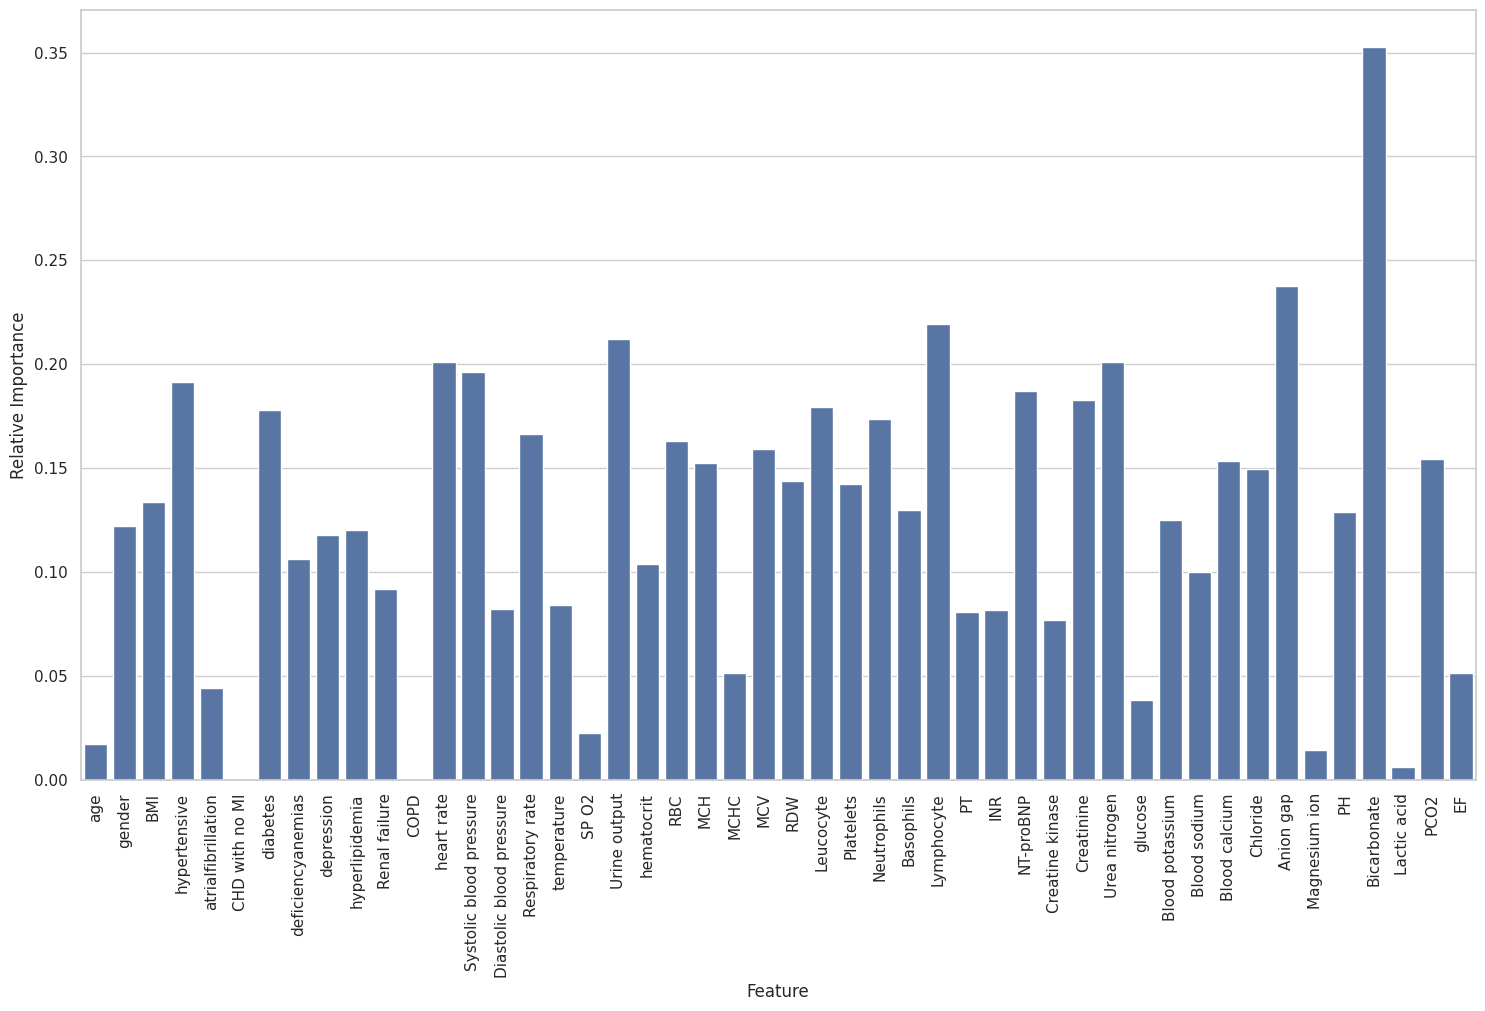

In [ ]:
top_pc = top_pc.abs()
list_magnitude = top_pc.loc[0, :].values.tolist()
labels = top_pc.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': labels, 'Relative Importance': list_magnitude})
#feature_importance_df = feature_importance_df.nlargest(10, 'Relative Importance')

fig, ax =plt.subplots(figsize=(18,10))
sns.barplot(x='Feature', y='Relative Importance', data=feature_importance_df.reset_index())
plt.xticks(rotation=90)
plt.show()

# FS with Pearson Corr

In [ ]:
num_feats=30

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')
cor_feature

30 selected features


['hematocrit',
 'PT',
 'temperature',
 'INR',
 'BMI',
 'RBC',
 'MCV',
 'PH',
 'Urea nitrogen',
 'Anion gap',
 'Systolic blood pressure',
 'Chloride',
 'Blood calcium',
 'Platelets',
 'Basophils',
 'Urine output',
 'Neutrophils',
 'depression',
 'Respiratory rate',
 'RDW',
 'gender',
 'hypertensive',
 'Lymphocyte',
 'hyperlipidemia',
 'Leucocyte',
 'Bicarbonate',
 'deficiencyanemias',
 'diabetes',
 'heart rate',
 'Renal failure']

#Chi Square FS

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature

30 selected features


['gender',
 'BMI',
 'hypertensive',
 'atrialfibrillation',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'hyperlipidemia',
 'Renal failure',
 'heart rate',
 'Systolic blood pressure',
 'Respiratory rate',
 'Urine output',
 'RBC',
 'MCV',
 'RDW',
 'Leucocyte',
 'Platelets',
 'Neutrophils',
 'Basophils',
 'Lymphocyte',
 'PT',
 'INR',
 'NT-proBNP',
 'Urea nitrogen',
 'Blood calcium',
 'Chloride',
 'Anion gap',
 'PH',
 'Bicarbonate']

#RFE- Recursive Feature Elimination FS

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

Fitting estimator with 48 features.
Fitting estimator with 38 features.
30 selected features


['age',
 'gender',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'hyperlipidemia',
 'Renal failure',
 'heart rate',
 'Respiratory rate',
 'temperature',
 'Urine output',
 'hematocrit',
 'RBC',
 'MCHC',
 'RDW',
 'Leucocyte',
 'Platelets',
 'Basophils',
 'Lymphocyte',
 'PT',
 'Creatinine',
 'Urea nitrogen',
 'glucose',
 'Blood potassium',
 'Blood calcium',
 'Chloride',
 'Anion gap',
 'Bicarbonate',
 'Lactic acid',
 'PCO2']

# Embedded Random Foresr FS

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=17)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
embeded_rf_feature

15 selected features


['diabetes',
 'deficiencyanemias',
 'Renal failure',
 'heart rate',
 'Respiratory rate',
 'Urine output',
 'RDW',
 'Leucocyte',
 'Basophils',
 'Lymphocyte',
 'NT-proBNP',
 'Urea nitrogen',
 'Chloride',
 'Bicarbonate',
 'Lactic acid']

# Light GBM

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
embeded_lgb_feature

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 645, number of negative: 645
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9298
[LightGBM] [Info] Number of data points in the train set: 1290, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

['age',
 'gender',
 'BMI',
 'diabetes',
 'heart rate',
 'Diastolic blood pressure',
 'Respiratory rate',
 'Urine output',
 'RDW',
 'Leucocyte',
 'Platelets',
 'Basophils',
 'Lymphocyte',
 'Creatinine',
 'Urea nitrogen',
 'Blood potassium',
 'Bicarbonate',
 'PCO2',
 'EF']

In [ ]:
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)


,Feature,Pearson,Chi-2,RFE,Random Forest,LightGBM,Total
1,heart rate,True,True,True,True,True,5
2,diabetes,True,True,True,True,True,5
3,Urine output,True,True,True,True,True,5
4,Urea nitrogen,True,True,True,True,True,5
5,Respiratory rate,True,True,True,True,True,5
6,RDW,True,True,True,True,True,5
7,Lymphocyte,True,True,True,True,True,5
8,Leucocyte,True,True,True,True,True,5
9,Bicarbonate,True,True,True,True,True,5
10,Basophils,True,True,True,True,True,5


In [ ]:
X.columns

Index(['age', 'gender', 'BMI', 'hypertensive', 'atrialfibrillation',
       'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression',
       'hyperlipidemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

# MAchine Learning with selected 27 features

In [ ]:
df.shape, df.columns

((719, 51),
 Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
        'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
        'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
        'Systolic blood pressure', 'Diastolic blood pressure',
        'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
        'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
        'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
        'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
        'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
        'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
        'Lactic acid', 'PCO2', 'EF'],
       dtype='object'))

In [ ]:
X = df.drop([ 'group', 'ID', 'gendera','outcome','hypertensive', 'CHD with no MI',
        'COPD','Systolic blood pressure',
       'Diastolic blood pressure',  'SP O2',
        'hematocrit', 'MCH', 'MCHC',
        'Neutrophils',
       'PT', 'INR', 'Creatine kinase', 'Creatinine', 'glucose', 'Blood sodium', 'Magnesium ion', 'PH',
         'PCO2', 'EF'],axis=1)
y = df['outcome']

In [ ]:
X.shape, X.columns

((719, 27),
 Index(['age', 'BMI', 'atrialfibrillation', 'diabetes', 'deficiencyanemias',
        'depression', 'Hyperlipemia', 'Renal failure', 'heart rate',
        'Respiratory rate', 'temperature', 'Urine output', 'RBC', 'MCV', 'RDW',
        'Leucocyte', 'Platelets', 'Basophils', 'Lymphocyte', 'NT-proBNP',
        'Urea nitrogen', 'Blood potassium', 'Blood calcium', 'Chloride',
        'Anion gap', 'Bicarbonate', 'Lactic acid'],
       dtype='object'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age', 'BMI', 'atrialfibrillation', 'diabetes', 'deficiencyanemias',
        'depression', 'Hyperlipemia', 'Renal failure', 'heart rate',
        'Respiratory rate', 'temperature', 'Urine output', 'RBC', 'MCV', 'RDW',
        'Leucocyte', 'Platelets', 'Basophils', 'Lymphocyte', 'NT-proBNP',
        'Urea nitrogen', 'Blood potassium', 'Blood calcium', 'Chloride',
        'Anion gap', 'Bicarbonate', 'Lactic acid']] = scaler.fit_transform(X_train[['age', 'BMI', 'atrialfibrillation', 'diabetes', 'deficiencyanemias',
        'depression', 'Hyperlipemia', 'Renal failure', 'heart rate',
        'Respiratory rate', 'temperature', 'Urine output', 'RBC', 'MCV', 'RDW',
        'Leucocyte', 'Platelets', 'Basophils', 'Lymphocyte', 'NT-proBNP',
        'Urea nitrogen', 'Blood potassium', 'Blood calcium', 'Chloride',
        'Anion gap', 'Bicarbonate', 'Lactic acid']])
X_train.head()
X_test[['age', 'BMI', 'atrialfibrillation', 'diabetes', 'deficiencyanemias',
        'depression', 'Hyperlipemia', 'Renal failure', 'heart rate',
        'Respiratory rate', 'temperature', 'Urine output', 'RBC', 'MCV', 'RDW',
        'Leucocyte', 'Platelets', 'Basophils', 'Lymphocyte', 'NT-proBNP',
        'Urea nitrogen', 'Blood potassium', 'Blood calcium', 'Chloride',
        'Anion gap', 'Bicarbonate', 'Lactic acid']] = scaler.transform(X_test[['age', 'BMI', 'atrialfibrillation', 'diabetes', 'deficiencyanemias',
        'depression', 'Hyperlipemia', 'Renal failure', 'heart rate',
        'Respiratory rate', 'temperature', 'Urine output', 'RBC', 'MCV', 'RDW',
        'Leucocyte', 'Platelets', 'Basophils', 'Lymphocyte', 'NT-proBNP',
        'Urea nitrogen', 'Blood potassium', 'Blood calcium', 'Chloride',
        'Anion gap', 'Bicarbonate', 'Lactic acid']])
X_test.head()

,age,BMI,atrialfibrillation,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,heart rate,Respiratory rate,temperature,Urine output,RBC,MCV,RDW,Leucocyte,Platelets,Basophils,Lymphocyte,NT-proBNP,Urea nitrogen,Blood potassium,Blood calcium,Chloride,Anion gap,Bicarbonate,Lactic acid
838,0.857143,0.451500,0.0,0.0,0.0,0.0,1.0,1.0,0.483024,0.515216,0.585043,0.409578,0.355162,0.620690,0.265907,0.341584,0.308537,0.2500,0.158333,0.528017,0.423211,0.555556,0.591091,0.610092,0.660740,0.412500,0.038298
988,0.380952,0.482467,0.0,0.0,0.0,1.0,1.0,0.0,0.548487,0.643649,0.620326,0.218906,0.338578,0.451795,0.404620,0.685395,0.086612,0.1875,0.145556,0.273935,0.583115,0.301535,0.309923,0.585722,0.681694,0.146875,0.168511
132,0.682540,0.227807,0.0,1.0,0.0,0.0,1.0,1.0,0.254239,0.188772,0.821908,0.682630,0.298246,0.612479,0.136223,0.183285,0.195864,0.2500,0.343519,0.298894,0.308187,0.251196,0.398387,0.545455,0.437591,0.492045,0.076596
1012,0.714286,0.418313,1.0,0.0,0.0,0.0,1.0,0.0,0.577995,0.583812,0.037392,0.092924,0.471374,0.817355,0.075027,0.422384,0.230670,0.0375,0.234259,0.132150,0.168729,0.548246,0.605950,0.065367,0.966334,0.263043,0.194681
733,0.476190,0.302456,0.0,0.0,0.0,1.0,1.0,0.0,0.611151,0.765591,0.375360,0.306469,0.441050,0.529064,0.107017,0.288460,0.580899,0.1250,0.208333,0.081044,0.178534,0.328947,0.437327,0.288991,0.212917,0.715000,0.944681


In [ ]:
X_train.shape

(575, 27)

# LR-12 feat

The accuracy of the Logistic Regression is(For training data) : 0.903
The accuracy of the Logistic Regression is(For test data) : 0.889


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.959,0.959,0.958,0.959,0.958182,1.490177,0.917615
10,extreme Gradient Boosting,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.953,0.954,0.953,0.953,0.953304,1.676449,0.906923
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.933,0.933,0.933,0.933,0.933056,2.421537,0.865789
8,Gradient Boosting,0.998,0.998,0.998,0.998,7.983090e-02,0.995580,0.997812,0.912,0.912,0.912,0.912,0.911780,3.166626,0.824220
4,Multi-Layer Perceptron,0.944,0.944,0.943,0.944,2.035688e+00,0.887026,0.943500,0.894,0.894,0.894,0.894,0.893604,3.818578,0.788050
11,Logistic Regression-12Feat,0.903,0.787,0.548,0.562,3.510338e+00,0.234398,0.547940,0.889,0.448,0.496,0.471,0.496124,4.004850,-0.028516
9,Adaptive Boosting,0.969,0.969,0.969,0.969,1.117633e+00,0.938019,0.969042,0.876,0.877,0.875,0.876,0.875281,4.470531,0.752091
0,Logistic Regression,0.906,0.906,0.906,0.906,3.392813e+00,0.811786,0.905923,0.858,0.858,0.858,0.858,0.857840,5.122483,0.715584
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.850,0.850,0.850,0.850,0.849861,5.401891,0.699965
1,Support Vector Machine,0.910,0.910,0.910,0.910,3.233152e+00,0.820578,0.910299,0.848,0.847,0.847,0.847,0.847495,5.495027,0.694898


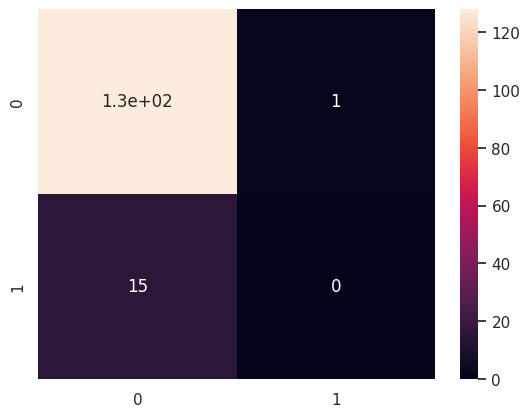

In [ ]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(log_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Logistic Regression is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(log_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Logistic Regression is(For test data) :',acc_test1)

y_pred_train= log_model.predict(X_train)
y_pred_test= log_model.predict(X_test)


precision_train1=format(precision_score(y_train, log_model.predict(X_train), average='macro'),'.3f')
precision_test1=format(precision_score(y_test, log_model.predict(X_test), average='macro'),'.3f')


recall_train1=format(recall_score(y_train,log_model.predict(X_train), average='macro'),'.3f')
recall_test1=format(recall_score(y_test,log_model.predict(X_test), average='macro'),'.3f')

f1_train1=format(f1_score(y_train,log_model.predict(X_train), average='macro'),'.3f')
f1_test1=format(f1_score(y_test,log_model.predict(X_test), average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Logistic Regression-12Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# SVM-12

The accuracy of the Support Vector Machine is(For training data) : 0.897
The accuracy of the Support Vector Machine is(For test data) : 0.896


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.959,0.959,0.958,0.959,0.958182,1.490177,0.917615
10,extreme Gradient Boosting,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.953,0.954,0.953,0.953,0.953304,1.676449,0.906923
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.933,0.933,0.933,0.933,0.933056,2.421537,0.865789
8,Gradient Boosting,0.998,0.998,0.998,0.998,7.983090e-02,0.995580,0.997812,0.912,0.912,0.912,0.912,0.911780,3.166626,0.824220
12,Support Vector Machine-12Feat,0.897,0.449,0.500,0.473,3.698392e+00,0.000000,0.500000,0.896,0.448,0.500,0.473,0.500000,3.754547,0.000000
4,Multi-Layer Perceptron,0.944,0.944,0.943,0.944,2.035688e+00,0.887026,0.943500,0.894,0.894,0.894,0.894,0.893604,3.818578,0.788050
11,Logistic Regression-12Feat,0.903,0.787,0.548,0.562,3.510338e+00,0.234398,0.547940,0.889,0.448,0.496,0.471,0.496124,4.004850,-0.028516
9,Adaptive Boosting,0.969,0.969,0.969,0.969,1.117633e+00,0.938019,0.969042,0.876,0.877,0.875,0.876,0.875281,4.470531,0.752091
0,Logistic Regression,0.906,0.906,0.906,0.906,3.392813e+00,0.811786,0.905923,0.858,0.858,0.858,0.858,0.857840,5.122483,0.715584
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.850,0.850,0.850,0.850,0.849861,5.401891,0.699965


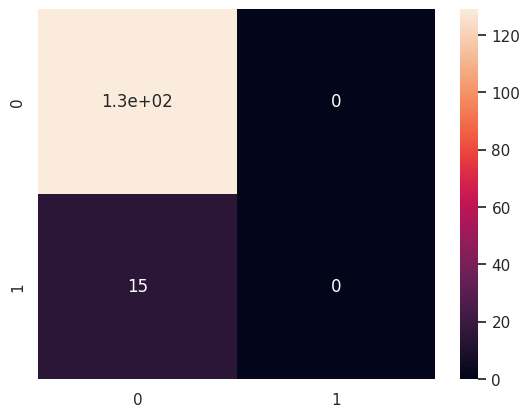

In [ ]:
svm_model =SVC(kernel='linear',gamma='auto',probability=True)
svm_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(svm_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Support Vector Machine is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(svm_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Support Vector Machine is(For test data) :',acc_test1)

y_pred_train= svm_model.predict(X_train)
y_pred_test= svm_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Support Vector Machine-12Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# RF-12

The accuracy of the Random Forest Classifier  is(For training data) : 1.000
The accuracy of the Random Forest Classifier is(For test data) : 0.896


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.959,0.959,0.958,0.959,0.958182,1.490177,0.917615
10,extreme Gradient Boosting,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.953,0.954,0.953,0.953,0.953304,1.676449,0.906923
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.933,0.933,0.933,0.933,0.933056,2.421537,0.865789
8,Gradient Boosting,0.998,0.998,0.998,0.998,7.983090e-02,0.995580,0.997812,0.912,0.912,0.912,0.912,0.911780,3.166626,0.824220
12,Support Vector Machine-12Feat,0.897,0.449,0.500,0.473,3.698392e+00,0.000000,0.500000,0.896,0.448,0.500,0.473,0.500000,3.754547,0.000000
13,Random Forest Classifier-12feat,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.896,0.448,0.500,0.473,0.500000,3.754547,0.000000
4,Multi-Layer Perceptron,0.944,0.944,0.943,0.944,2.035688e+00,0.887026,0.943500,0.894,0.894,0.894,0.894,0.893604,3.818578,0.788050
11,Logistic Regression-12Feat,0.903,0.787,0.548,0.562,3.510338e+00,0.234398,0.547940,0.889,0.448,0.496,0.471,0.496124,4.004850,-0.028516
9,Adaptive Boosting,0.969,0.969,0.969,0.969,1.117633e+00,0.938019,0.969042,0.876,0.877,0.875,0.876,0.875281,4.470531,0.752091
0,Logistic Regression,0.906,0.906,0.906,0.906,3.392813e+00,0.811786,0.905923,0.858,0.858,0.858,0.858,0.857840,5.122483,0.715584


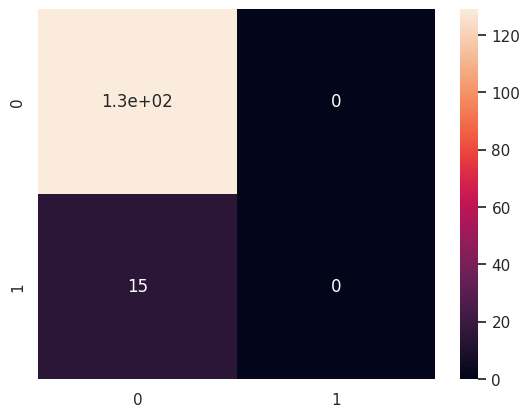

In [ ]:
rf_model =RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(rf_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Random Forest Classifier  is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(rf_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Random Forest Classifier is(For test data) :',acc_test1)

y_pred_train= rf_model.predict(X_train)
y_pred_test= rf_model.predict(X_test)


precision_train1=format(precision_score(y_train, rf_model.predict(X_train), average='macro'),'.3f')
precision_test1=format(precision_score(y_test, rf_model.predict(X_test), average='macro'),'.3f')


recall_train1=format(recall_score(y_train,rf_model.predict(X_train), average='macro'),'.3f')
recall_test1=format(recall_score(y_test,rf_model.predict(X_test), average='macro'),'.3f')

f1_train1=format(f1_score(y_train,rf_model.predict(X_train), average='macro'),'.3f')
f1_test1=format(f1_score(y_test,rf_model.predict(X_test), average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Random Forest Classifier-12feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# SGD-12feat


The accuracy of the Stochastic Gradient Descent is(For training data) : 0.899
The accuracy of the Stochastic Gradient Descent(For test data) : 0.889


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.959,0.959,0.958,0.959,0.958182,1.490177,0.917615
10,extreme Gradient Boosting,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.953,0.954,0.953,0.953,0.953304,1.676449,0.906923
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.933,0.933,0.933,0.933,0.933056,2.421537,0.865789
8,Gradient Boosting,0.998,0.998,0.998,0.998,7.983090e-02,0.995580,0.997812,0.912,0.912,0.912,0.912,0.911780,3.166626,0.824220
12,Support Vector Machine-12Feat,0.897,0.449,0.500,0.473,3.698392e+00,0.000000,0.500000,0.896,0.448,0.500,0.473,0.500000,3.754547,0.000000
13,Random Forest Classifier-12feat,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.896,0.448,0.500,0.473,0.500000,3.754547,0.000000
4,Multi-Layer Perceptron,0.944,0.944,0.943,0.944,2.035688e+00,0.887026,0.943500,0.894,0.894,0.894,0.894,0.893604,3.818578,0.788050
11,Logistic Regression-12Feat,0.903,0.787,0.548,0.562,3.510338e+00,0.234398,0.547940,0.889,0.448,0.496,0.471,0.496124,4.004850,-0.028516
14,Stochastic Gradient Descent-12 Feat,0.899,0.751,0.523,0.520,3.635708e+00,0.153519,0.523486,0.889,0.448,0.496,0.471,0.496124,4.004850,-0.028516
9,Adaptive Boosting,0.969,0.969,0.969,0.969,1.117633e+00,0.938019,0.969042,0.876,0.877,0.875,0.876,0.875281,4.470531,0.752091


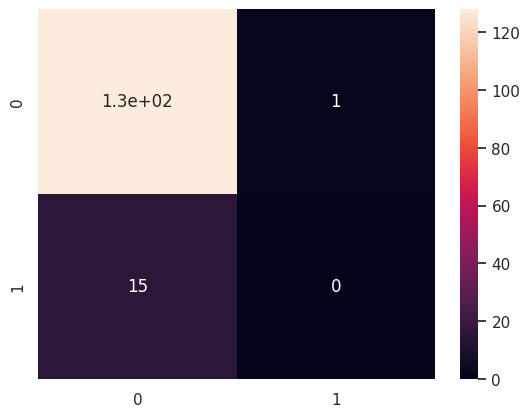

In [ ]:
sgd_model=SGDClassifier(max_iter=1000, tol=1e-4)
sgd_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(sgd_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Stochastic Gradient Descent is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(sgd_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Stochastic Gradient Descent(For test data) :',acc_test1)

y_pred_train= sgd_model.predict(X_train)
y_pred_test= sgd_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Stochastic Gradient Descent-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Stacking Ensemble

In [ ]:
comp_ev = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],

                           'F1_score(train)':[],
                          'ROC(train)':[],
                        'Log_Loss(train)':[],
                        'mathew_corrcoef(train)':[],
                         'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recall(test)':[],

                           'F1_score(test)':[],
                          'ROC(test)':[],
                        'Log_Loss(test)':[],
                        'mathew_corrcoef(test)':[],})

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
log_model = LogisticRegression(max_iter=500)
from sklearn import svm, datasets
!pip install catboost
from catboost import CatBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
#grad_model = GradientBoostingClassifier(random_state=1000, learning_rate=0.1,n_estimators=500);
from sklearn.ensemble import AdaBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.0 MB/s eta 0:00:00


In [ ]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = SVC(kernel='linear',gamma='auto',probability=True)
clf4 = DecisionTreeClassifier()
#clf5 = SGDClassifier(max_iter=1000, tol=1e-4)


estimators = [('logistic_regression',clf1),('knn',clf2),('SVM',clf3),('DT',clf4)]

In [ ]:
X_train.shape

(575, 27)

The accuracy of the Stacking Classifier is(For training data) : 0.899
The accuracy of the stacking Classifier is(For test data) : 0.861


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
0,Stacked ensemble(XGB-meta)-12 Feat,0.899,0.721,0.666,0.688,3.635708,0.383212,0.666092,0.861,0.591,0.569,0.577,0.568992,5.006063,0.15869


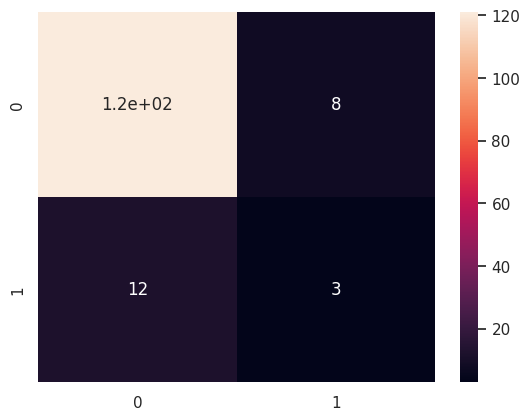

In [ ]:
# Build stack model
stack_model = StackingClassifier(
    #estimators=estimators, final_estimator=xgb.XGBClassifier()
    estimators=estimators,
    final_estimator=xgb.XGBClassifier(),
    #final_estimator= GradientBoostingClassifier(),
    #final_estimator= AdaBoostClassifier(),
    #final_estimator= CatBoostClassifier(),
    #final_estimator=RandomFor
    cv=10
)

stack_model.fit(X_train, y_train);

#x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
acc_train1=format(accuracy_score(stack_model.predict(X_train), y_train),'.3f')
print('The accuracy of the Stacking Classifier is(For training data) :',acc_train1)
acc_test1=format(accuracy_score(stack_model.predict(X_test), y_test),'.3f')
print('The accuracy of the stacking Classifier is(For test data) :',acc_test1)

y_pred_train= stack_model.predict(X_train)
y_pred_test= stack_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
#comp_ev.loc[r] = ['Stacked ensemble(GB-meta)-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
comp_ev.loc[r] = ['Stacked ensemble(XGB-meta)-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#comp_ev.loc[r] = ['Stacked ensemble(RF-meta)-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#comp_ev.loc[r] = ['Stacked ensemble(ada-meta)-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#comp_ev.loc[r] = ['Stacked ensemble(GB-meta)-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)



# Voting Ensemble-soft

The accuracy of the voting Classifier is(For training data) : 1.000
The accuracy of the voting Classifier is(For test data) : 0.896


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
1,Voting Ensemble-12 Feat,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.896,0.448,0.500,0.473,0.500000,3.754547,0.00000
0,Stacked ensemble(XGB-meta)-12 Feat,0.899,0.721,0.666,0.688,3.635708e+00,0.383212,0.666092,0.861,0.591,0.569,0.577,0.568992,5.006063,0.15869


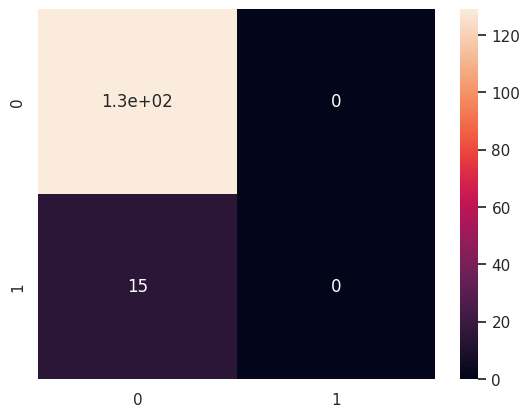

In [ ]:
import xgboost as xgb
clf1= SVC(kernel='linear',gamma='auto',probability=True)
clf2=RandomForestClassifier(criterion='entropy',n_estimators=100)
clf3=xgb.XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)
clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('svc', clf1), ('rfe', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),],
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)


#x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
acc_train1=format(accuracy_score(eclf1.predict(X_train), y_train),'.3f')
print('The accuracy of the voting Classifier is(For training data) :',acc_train1)
acc_test1=format(accuracy_score(eclf1.predict(X_test), y_test),'.3f')
print('The accuracy of the voting Classifier is(For test data) :',acc_test1)

y_pred_train= eclf1.predict(X_train)
y_pred_test= eclf1.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
#comp_ev.loc[r] = ['Stacked ensemble(GB-meta)-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
comp_ev.loc[r] = ['Voting Ensemble-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#comp_ev.loc[r] = ['Stacked ensemble(RF-meta)-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#comp_ev.loc[r] = ['Stacked ensemble(ada-meta)-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#comp_ev.loc[r] = ['Stacked ensemble(GB-meta)-12 Feat',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

